# SAT & ACT Participation Rates Study

**Purpose:** The purpose of this project was to use Pandas, NumPy, Seaborn, and Matplotlib to explore and analyze data on SAT and ACT participation rates by state.

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

sat = pd.read_csv('../data/sat.csv')
act = pd.read_csv('../data/act.csv')

##### 2. Print the first ten rows of each dataframe.

In [2]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [3]:
sat.columns

Index(['Unnamed: 0', 'State', 'Participation',
       'Evidence-Based Reading and Writing', 'Math', 'Total'],
      dtype='object')

In [4]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

### SAT DATA

'Unnamed: 0': redundant index

'State': Categorical variable representing U.S. State

'Participation': Percent of student population taking the test

'Evidence-Based Reading and Writing': Average score (out of 800) on reading and writing section of the SAT in the state

'Math': Average score (out of 800) on math section of the SAT in the state

'Total': Average total score (sum of reading and writing plus math) in the state


### ACT DATA

'Unnamed: 0': redundant index

'State': Categorical variable representing U.S. State

'Participation': Percent of student population taking the test

'English': Average score on reading and writing section of the ACT in the state

'Math': Average score on math section of the ACT in the state

'Reading': Average score on reading section of the ACT in the state

'Science': Average score on science section of the ACT in the state

'Composite': Average composite score for the state

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [5]:
sat.isnull().sum()

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [6]:
act.isnull().sum()

Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [7]:
sat.drop('Unnamed: 0', axis = 1, inplace = True)
act.drop('Unnamed: 0', axis = 1, inplace = True)

At first glance,the data appears to be complete, but there are a couple of issues that I would like to clean up before beginning my analysis. 

1. The unnecessary 'Unnamed: 0' column in each dataset is redundant, since pandas dataframes generate an 'index' for each row already. I will delete these columns. 

2. The fact that participation is not a numerical value (due to the % sign), will be a problem, so I will need to convert these entries into a numerical type. 

3. I noticed two obvious problems with Maryland's date. That the value for the average SAT math score in Maryland looks clearly wrong. '52' is extremely low and seems unlikely to be correct. Also, the different between Maryland's total and verbal scores is '524', so it looks like this was just a typo. I verified that the correct value for Maryland's SAT Math score is '524' looking at the site where the data came from (link below). I will make the adjustment here. Maryland's ACT Science average also appears to be a type, which I verified and corrected after looking at the source data (link below).

##### 5. Print the types of each column.

In [8]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [10]:
sat['Participation'] = sat['Participation'].map(lambda part_cell: part_cell.replace('%','')).astype(float) / 100
act['Participation'] = act['Participation'].map(lambda part_cell: part_cell.replace('%','')).astype(float) / 100

In [11]:
new_columns_sat = {
        'State':'state',
        'Participation':'sat_participation',
        'Evidence-Based Reading and Writing':'sat_read_write',
        'Math':'sat_math',
        'Total':'sat_total'
    }

new_columns_act = {
        'State':'state',
        'Participation':'act_participation',
        'English':'act_english',
        'Math':'act_math',
        'Reading':'act_reading',
        'Science':'act_science',
        'Composite':'act_composite'
}

sat.rename(columns = new_columns_sat, inplace = True)
act.rename(columns = new_columns_act, inplace = True)

In [12]:
# this is a quick check I used to check for obvious errors in SAT data
# I know that SAT Total should be equal (or very close) to SAT Math + SAT Verbal
# Looking below, Maryland is clearly an issue
#the rest appear close enough that the difference shouldn't affect analysis
sat_check = (sat.sat_math + sat.sat_read_write) != sat.sat_total
sat[sat_check]

,state,sat_participation,sat_read_write,sat_math,sat_total
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
12,Idaho,0.93,513,493,1005
15,Iowa,0.02,641,635,1275
18,Louisiana,0.04,611,586,1198
20,Maryland,0.69,536,52,1060
21,Massachusetts,0.76,555,551,1107
22,Michigan,1.00,509,495,1005
24,Mississippi,0.02,634,607,1242
27,Nebraska,0.03,629,625,1253


In [13]:
# Setting Maryland's SAT Math average equal to difference between 'Total' and 'Verbal'
sat.loc[20,'sat_math'] = sat.loc[20,'sat_total'] - sat.loc[20,'sat_read_write']

In [14]:
# Hard-coding Maryland's ACT Science score to it's correct value, 23.2 (verified in source data, see link above)
act.loc[21,'act_science'] = 23.2

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [15]:
# Creating individual dictionaries for State : column data. Time permitting, I'd like to find a better way to do this.
sat_part_dict = {sat.state.iloc[i]:sat.sat_participation.iloc[i] for i in range(sat.shape[0])}
sat_read_write_dict = {sat.state.iloc[i]:sat.sat_read_write.iloc[i] for i in range(sat.shape[0])}
sat_math_dict = {sat.state.iloc[i]:sat.sat_math.iloc[i] for i in range(sat.shape[0])}
sat_total_dict = {sat.state.iloc[i]:sat.sat_total.iloc[i] for i in range(sat.shape[0])}

act_part_dict = {act.state.iloc[i]:act.act_participation.iloc[i] for i in range(act.shape[0])}
act_eng_dict = {act.state.iloc[i]:act.act_english.iloc[i] for i in range(act.shape[0])}
act_math_dict = {act.state.iloc[i]:act.act_math.iloc[i] for i in range(act.shape[0])}
act_sci_dict = {act.state.iloc[i]:act.act_science.iloc[i] for i in range(act.shape[0])}
act_comp_dict = {act.state.iloc[i]:act.act_composite.iloc[i] for i in range(act.shape[0])}

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [16]:
sat_dict = sat.to_dict(orient = 'list')
act_dict = act.to_dict(orient = 'list')

##### 9. Merge the dataframes on the state column.

In [17]:
# creating two dataframes, one which will include national data and one which won't
# allows me to not lose the national data, while leaving the national data column out for calculations below
tests = pd.merge(sat, act, on = 'state',how = 'inner')
tests_nat = pd.merge(sat, act, on = 'state',how = 'outer')

Merging the dataframes creates a problem with NaN values. Since the SAT does not have a row for National data, we get NaN values for National averages for the SAT. Looking at the data source, I found the following national average data:

Total: 1060
Evidence-Based Reading and Writing (EBRW): 533
Math: 527

High School Graduates: 3,385,917
Test Takers: 1,715,481 

Sources for data used to calculate national participation:

https://reports.collegeboard.org/sat-suite-program-results/detailed-2017-reports

https://knocking.wiche.edu/

In [18]:
test_takers = 1715481
eligible_students = 3385917
national_participation = test_takers / eligible_students
national_participation

0.5066518169228602

In [19]:
tests_nat.loc[51, 'sat_read_write'], tests_nat.loc[51, 'sat_math'], tests_nat.loc[51, 'sat_total'], tests_nat.loc[51, 'sat_participation'] = 533, 527, 1060, round(national_participation, 2)

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

I already did this above, when I renamed the columns in each dictionary, during my initial 'data cleaning' stage (see question 6).

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [20]:
tests.describe().loc[['min','max'],:]

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
min,0.02,482.0,468.0,950.0,0.08,16.3,18.0,18.1,18.2,17.8
max,1.00,644.0,651.0,1295.0,1.00,25.5,25.3,26.0,24.9,25.5


In [21]:
tests.describe()

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


#### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [22]:
def stadev(array):
    '''Returns the standard deviation of a given array'''
    stdv = np.sqrt((1/len(array)) * (sum([((i - np.mean(array)) ** 2) for i in array])))
    return stdv

sd = tests.loc[:, tests.columns != 'state'].apply(stadev).tolist()

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [23]:
x = [np.nan]
x.extend(sd) # Add a 'NaN' value as a placeholder for the 'state' column at the beginning of my sd list
sd_df = pd.DataFrame(x).T # create a dataframe from my list, and transpose it to make it a row
sd_df.columns = tests.columns # give my row the same columns as my test scores dataframe

In [24]:
tests_sd = tests.append(sd_df)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [25]:
tests.sort_values(['sat_participation'], ascending = True)

,state,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,21.8
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [26]:
# can filter by any of the below masks. I chose to display only the third, filtering by both participation rates
sat_participation_filter = tests['sat_participation'] > 0.5
act_participation_filter = tests['act_participation'] > 0.5
participation_filter = (tests.sat_participation > 0.5) & (tests.act_participation > 0.5)

tests[participation_filter]

,state,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

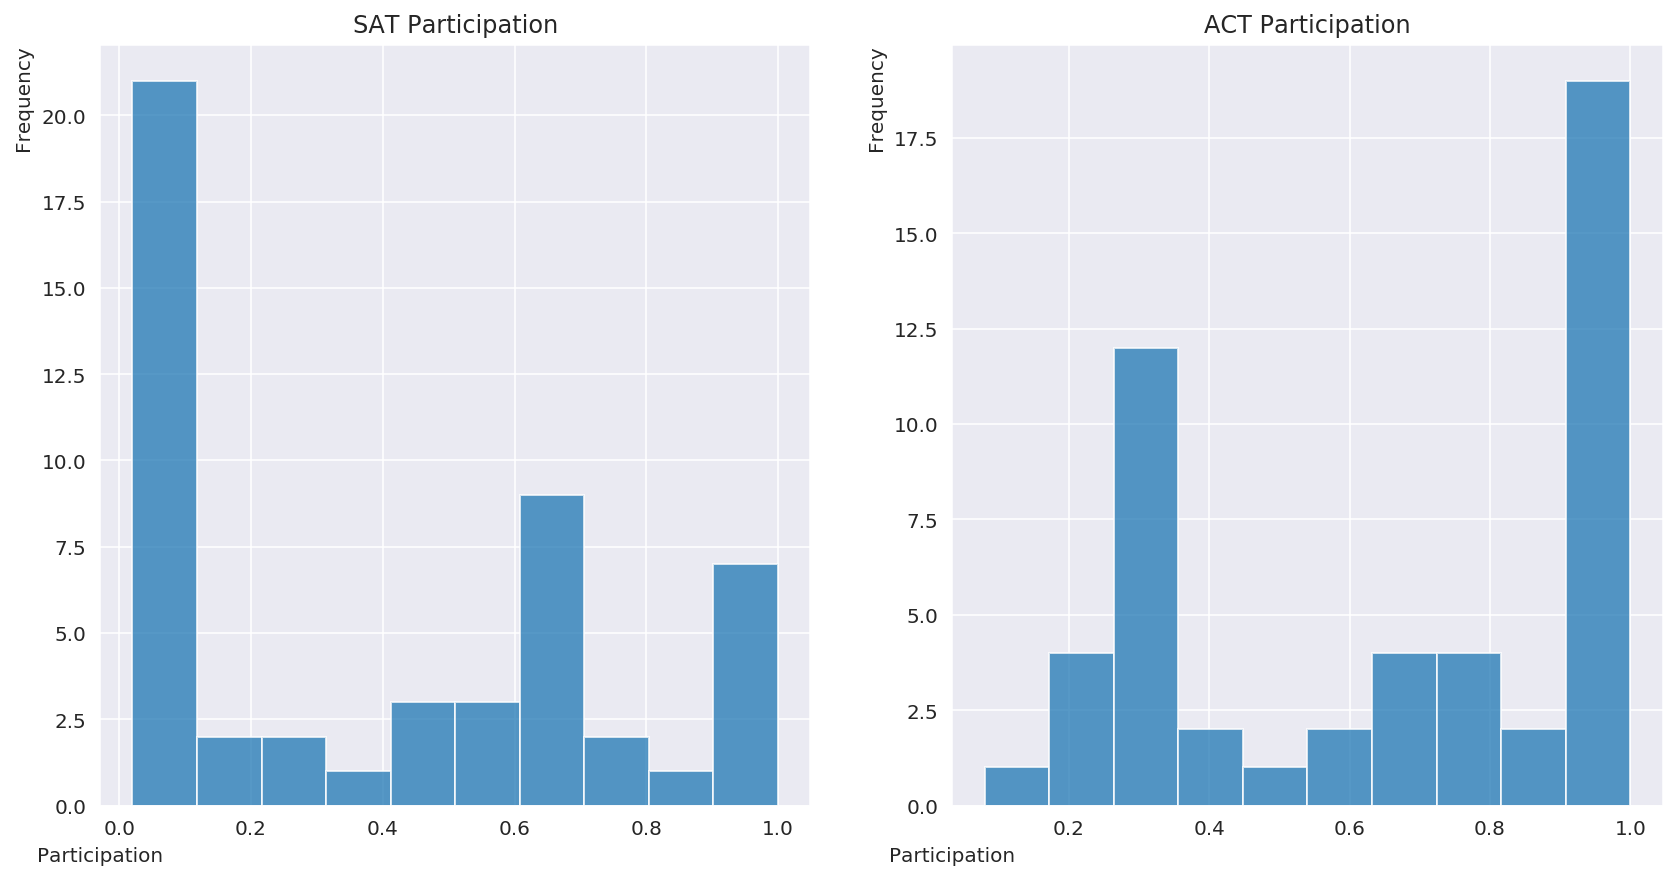

In [27]:
# I chose to plot them next to one another, because I think it looks better
fig, axes = plt.subplots(1,2, figsize = (14,7))

axes[0].set_title('SAT Participation')
axes[0].set_xlabel('Participation', position = (0,0))
axes[0].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['sat_participation'].hist(ax = axes[0], alpha = 0.75)

axes[1].set_title('ACT Participation')
axes[1].set_xlabel('Participation', position = (0,0))
axes[1].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['act_participation'].hist(ax = axes[1], alpha = 0.75);

##### 17. Plot the Math(s) distributions from both data sets.

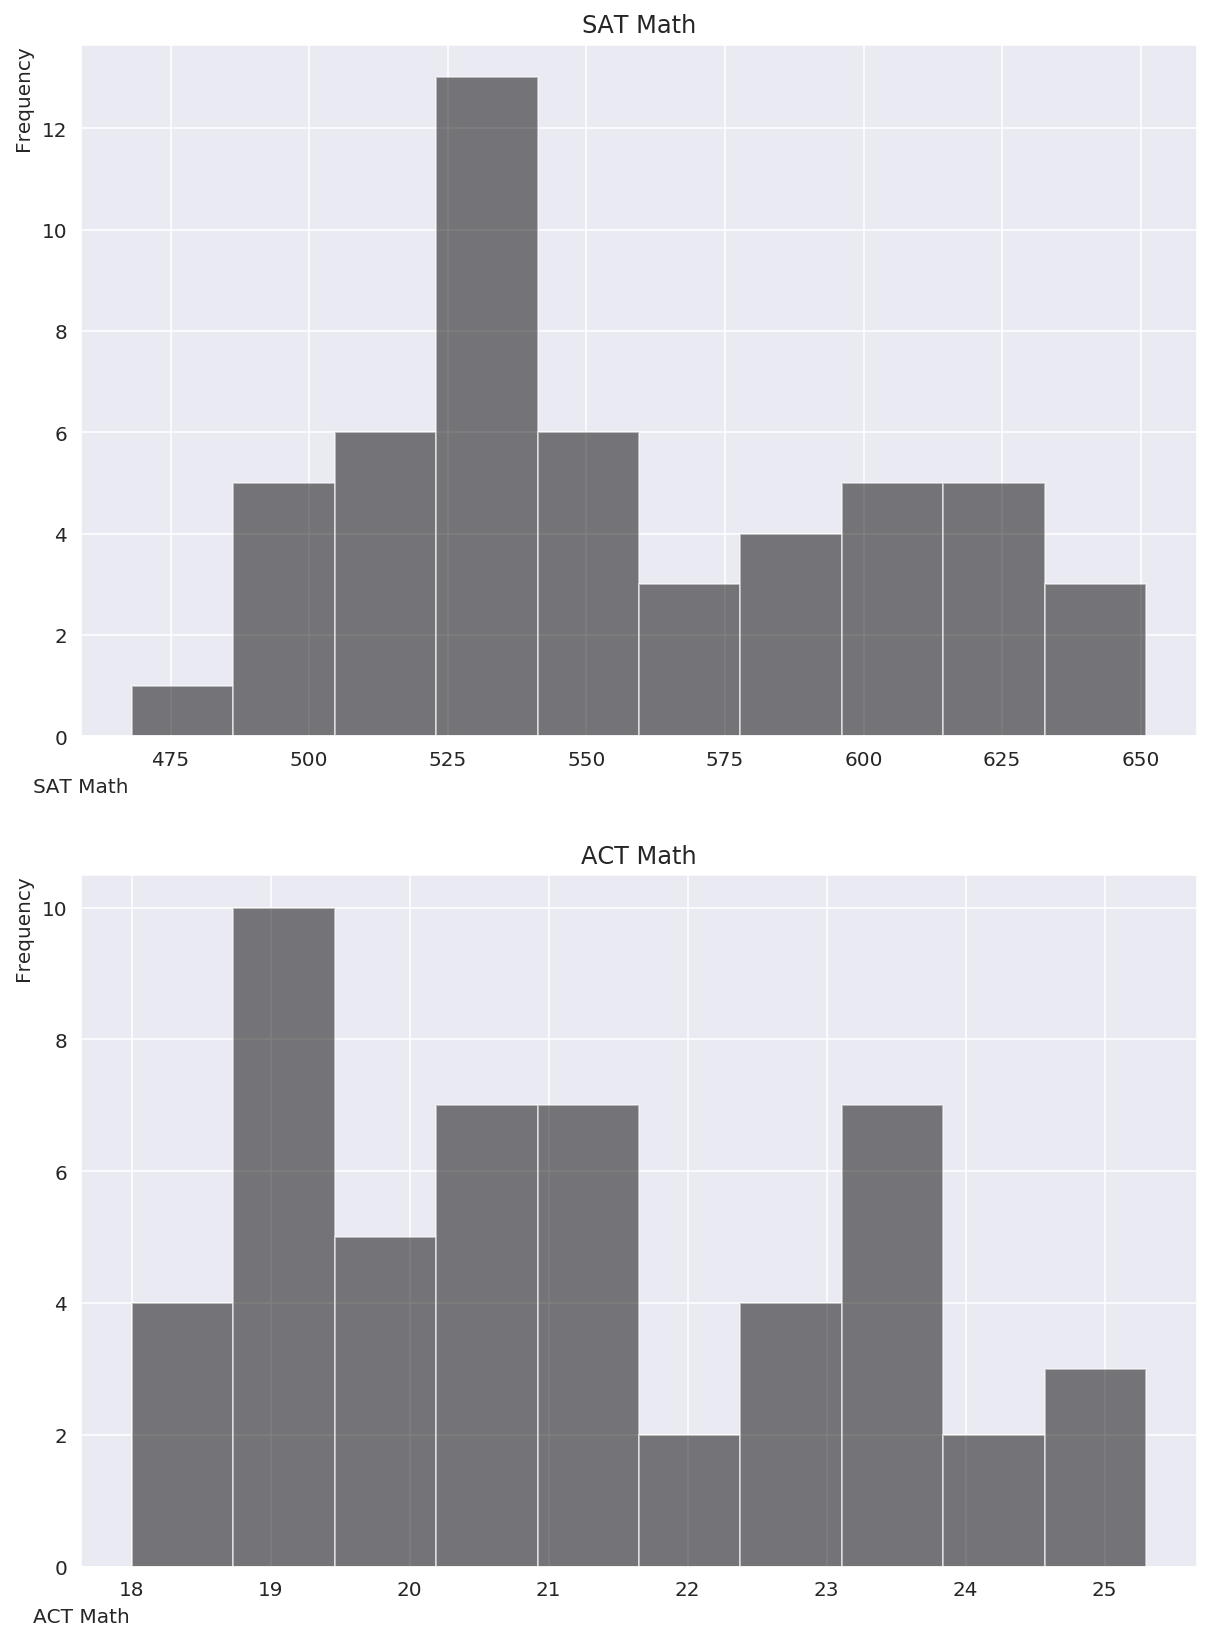

In [28]:
# For this one I did 2 rows, 1 column..
fig, axes = plt.subplots(2,1, figsize = (10,14))

axes[0].set_title('SAT Math')
axes[0].set_xlabel('SAT Math', position = (0,0))
axes[0].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['sat_math'].hist(ax = axes[0], color = 'black', alpha = 0.5)

axes[1].set_title('ACT Math')
axes[1].set_xlabel('ACT Math', position = (0,0))
axes[1].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['act_math'].hist(ax = axes[1], color = 'black', alpha = 0.5);

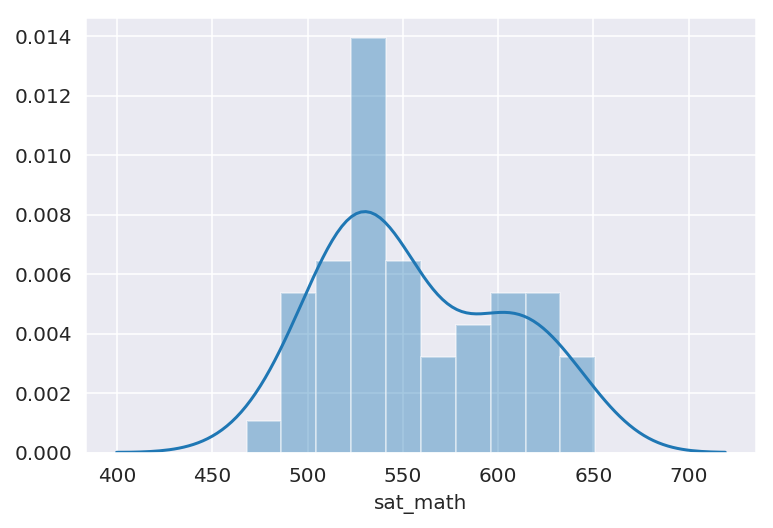

In [29]:
sns.distplot(tests.sat_math, bins = 10);

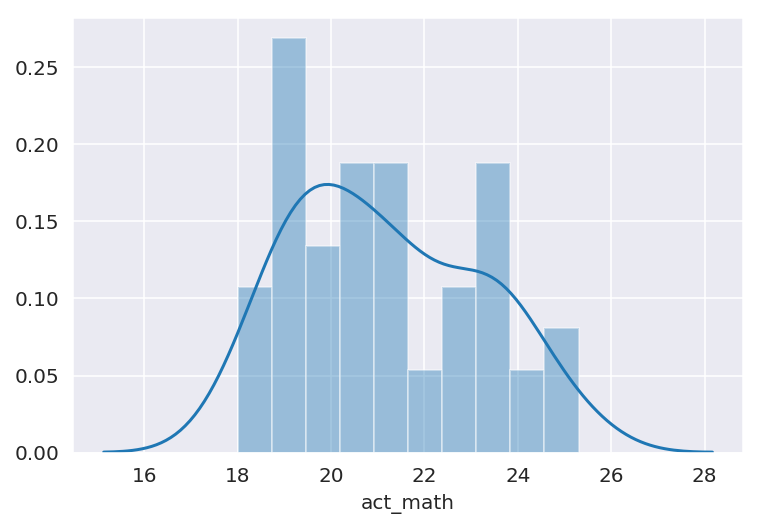

In [30]:
sns.distplot(tests.act_math, bins = 10);

##### 18. Plot the Verbal distributions from both data sets.

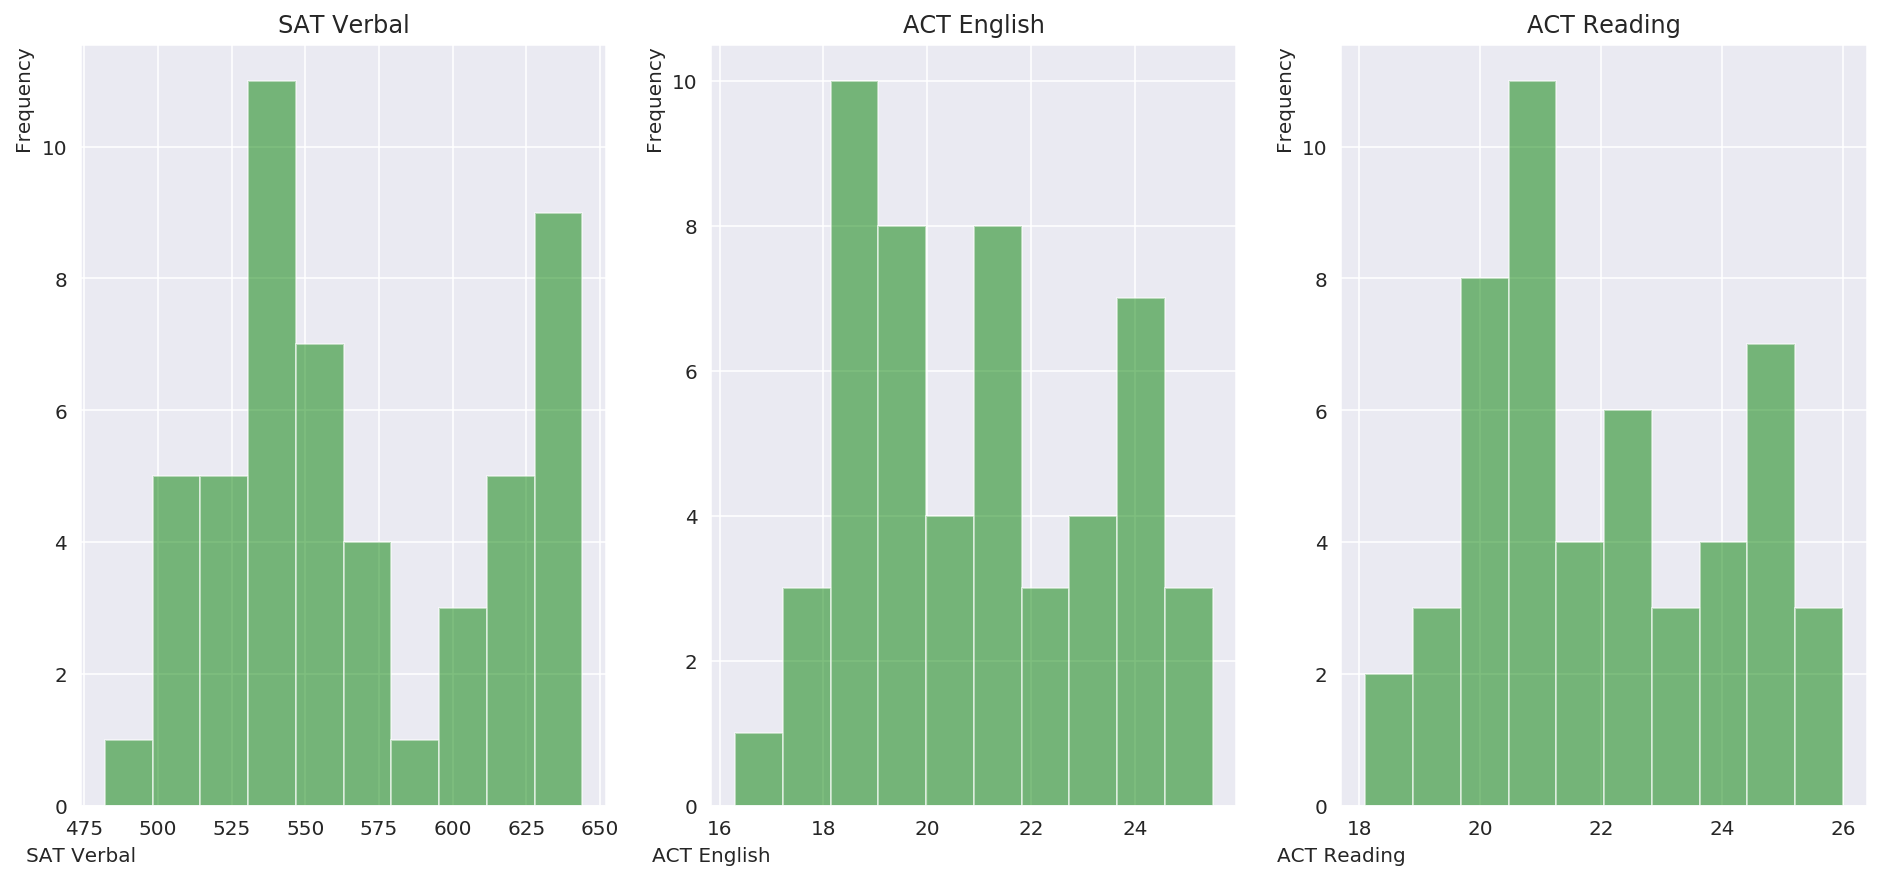

In [31]:
fig, axes = plt.subplots(1,3, figsize = (16,7))

axes[0].set_title('SAT Verbal')
axes[0].set_xlabel('SAT Verbal', position = (0,0))
axes[0].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['sat_read_write'].hist(ax = axes[0], color = 'green', alpha = 0.5)

axes[1].set_title('ACT English')
axes[1].set_xlabel('ACT English', position = (0,0))
axes[1].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['act_english'].hist(ax = axes[1], color = 'green', alpha = 0.5);

axes[2].set_title('ACT Reading')
axes[2].set_xlabel('ACT Reading', position = (0,0))
axes[2].set_ylabel('Frequency', position = (0,1), ha = 'right')
tests['act_reading'].hist(ax = axes[2], color = 'green', alpha = 0.5);

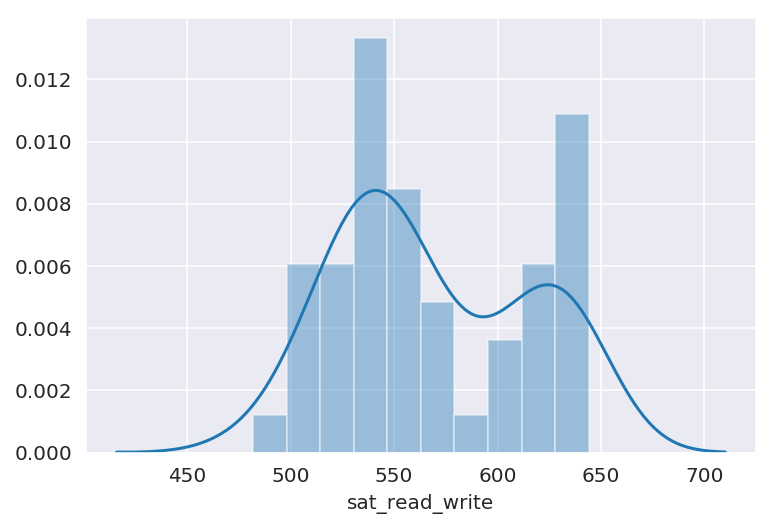

In [32]:
sns.distplot(tests.sat_read_write, bins = 10);

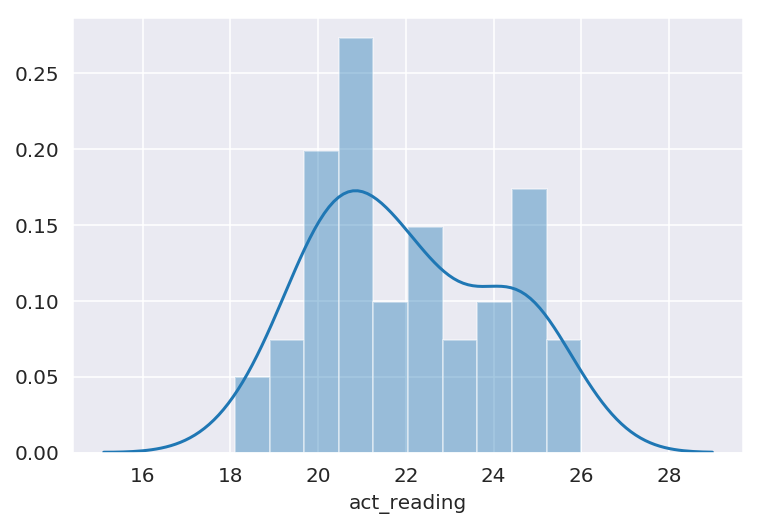

In [33]:
sns.distplot(tests.act_reading, bins = 10);

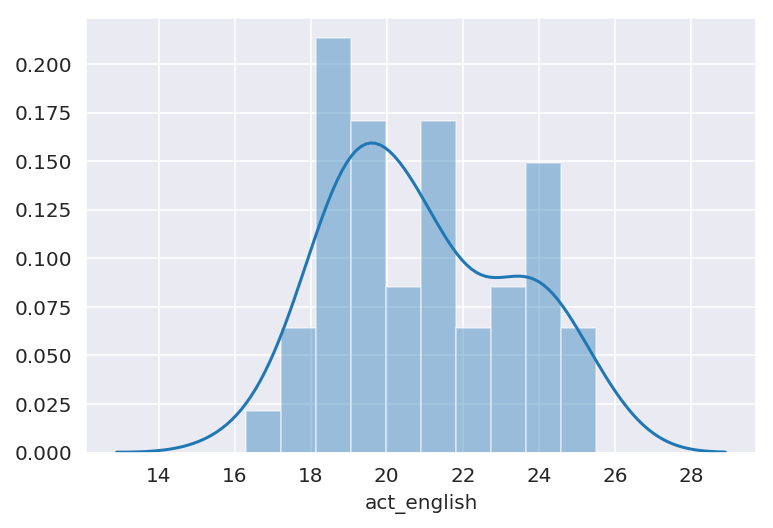

In [34]:
sns.distplot(tests.act_english, bins = 10);

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption is that data are normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

Visualizing the data suggests to me that none of the columns are normally distributed, as they clearly do not display the characteristic 'bell curve' shape of the normal distribution. The data on participation are heavily skewed, with a SAT participation having a significant portion of the data in the left tail, and the ACT showing the opposite - a large percentage of the data close to the maximum value. The scores data are multi-modal, with one peak appearing close to the mean of the series, and another clustered near the maximum value.

NOTE: for all tests below, I will test p-values against an alpha of 0.05.

Below I have created a dataframe which presents summary statistics for three tests I performed to determine if each numerical value in the tests data is normally distributed. Based on these tests (which I have described, along with a more in-depth discussion of the distributions below), none of the data appear to be normally distributed.

In [35]:
norm_test = round(tests.loc[:,tests.columns != 'state'].apply(stats.normaltest).apply(pd.Series), 4)
norm_test.columns = ['norm_test','norm_p']

In [36]:
skew = round(tests.loc[:,tests.columns != 'state'].apply(stats.skew).apply(pd.Series), 4)
skew.columns = ['skew']

In [37]:
skew_test = round(tests.loc[:,tests.columns != 'state'].apply(stats.skewtest).apply(pd.Series), 4)
skew_test.columns = ['skew_test','skew_p']

In [38]:
kurtosis = round(tests.loc[:,tests.columns != 'state'].apply(stats.kurtosis).apply(pd.Series), 4)
kurtosis.columns = ['kurtosis']

In [39]:
kurt_test = round(tests.loc[:,tests.columns != 'state'].apply(stats.kurtosistest).apply(pd.Series), 4)
kurt_test.columns = ['kurt_test','kurt_p']

In [40]:
normality_data = [norm_test, skew, skew_test, kurtosis, kurt_test]

In [41]:
normality_df = pd.concat(normality_data,axis = 1)
normality_df

,norm_test,norm_p,skew,skew_test,skew_p,kurtosis,kurt_test,kurt_p
sat_participation,24.8440,0.0000,0.3362,1.0712,0.2841,-1.3644,-4.8679,0.0000
sat_read_write,13.8182,0.0010,0.2646,0.8489,0.3959,-1.2194,-3.6190,0.0003
sat_math,5.7622,0.0561,0.3542,1.1265,0.2600,-0.9529,-2.1197,0.0340
sat_total,9.6072,0.0082,0.3017,0.9646,0.3347,-1.1154,-2.9456,0.0032
act_participation,72.5051,0.0000,-0.1921,-0.6197,0.5355,-1.5917,-8.4924,0.0000
act_english,4.9456,0.0843,0.3422,1.0897,0.2758,-0.9108,-1.9386,0.0526
act_math,6.5473,0.0379,0.3228,1.0301,0.3030,-1.0012,-2.3423,0.0192
act_reading,6.2486,0.0440,0.2614,0.8388,0.4016,-1.0038,-2.3548,0.0185
act_science,5.5013,0.0639,0.2123,0.6840,0.4940,-0.9802,-2.2435,0.0249
act_composite,6.5574,0.0377,0.3103,0.9914,0.3215,-1.0051,-2.3610,0.0182


##### 21. Plot some scatterplots examining relationships between all variables.

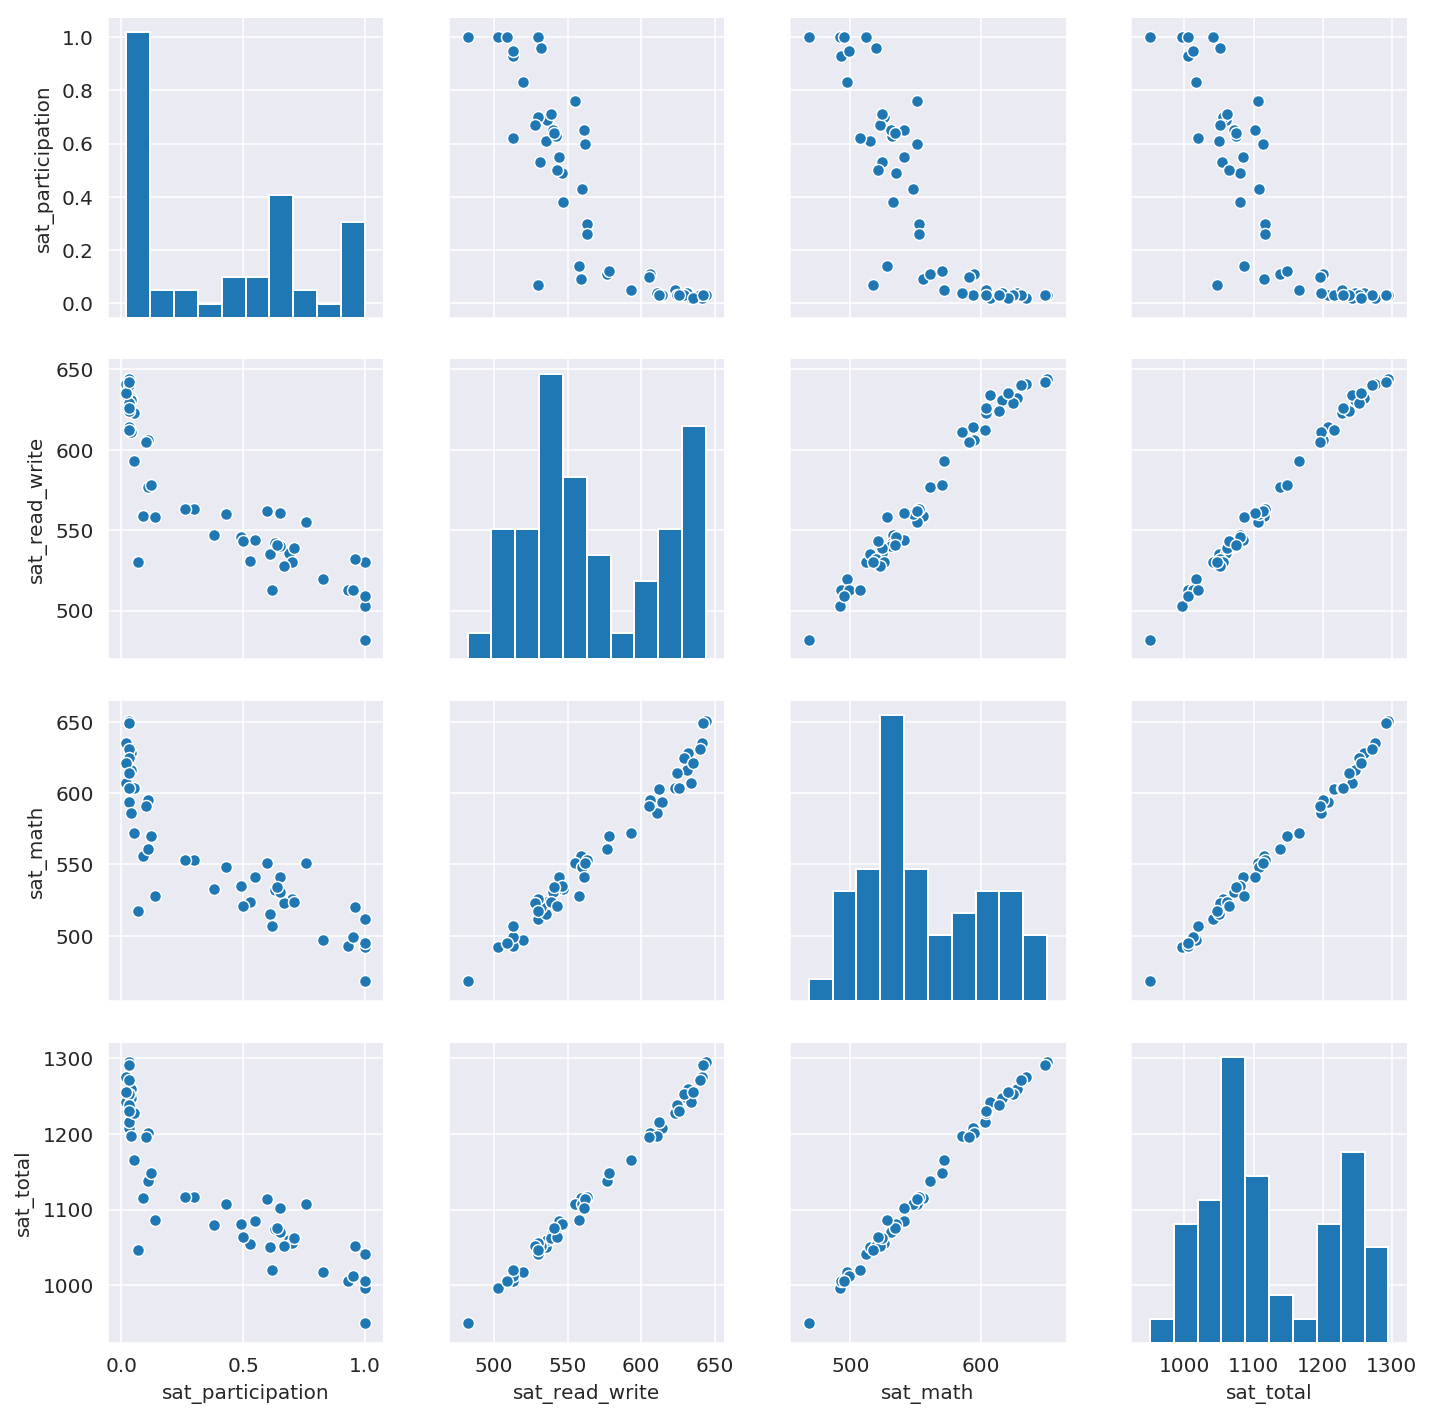

In [42]:
sns.pairplot(tests[['sat_participation','sat_read_write','sat_math','sat_total']]);

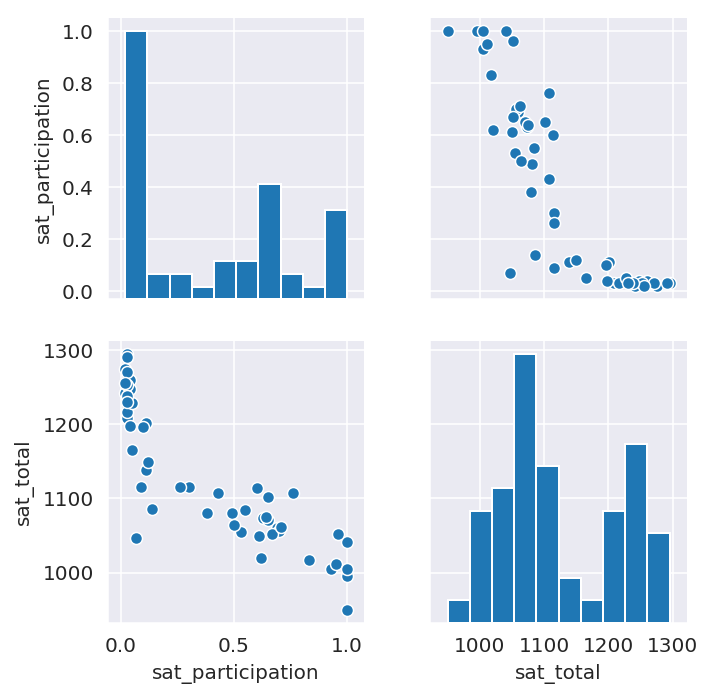

In [43]:
sns.pairplot(tests[['sat_participation','sat_total']]);

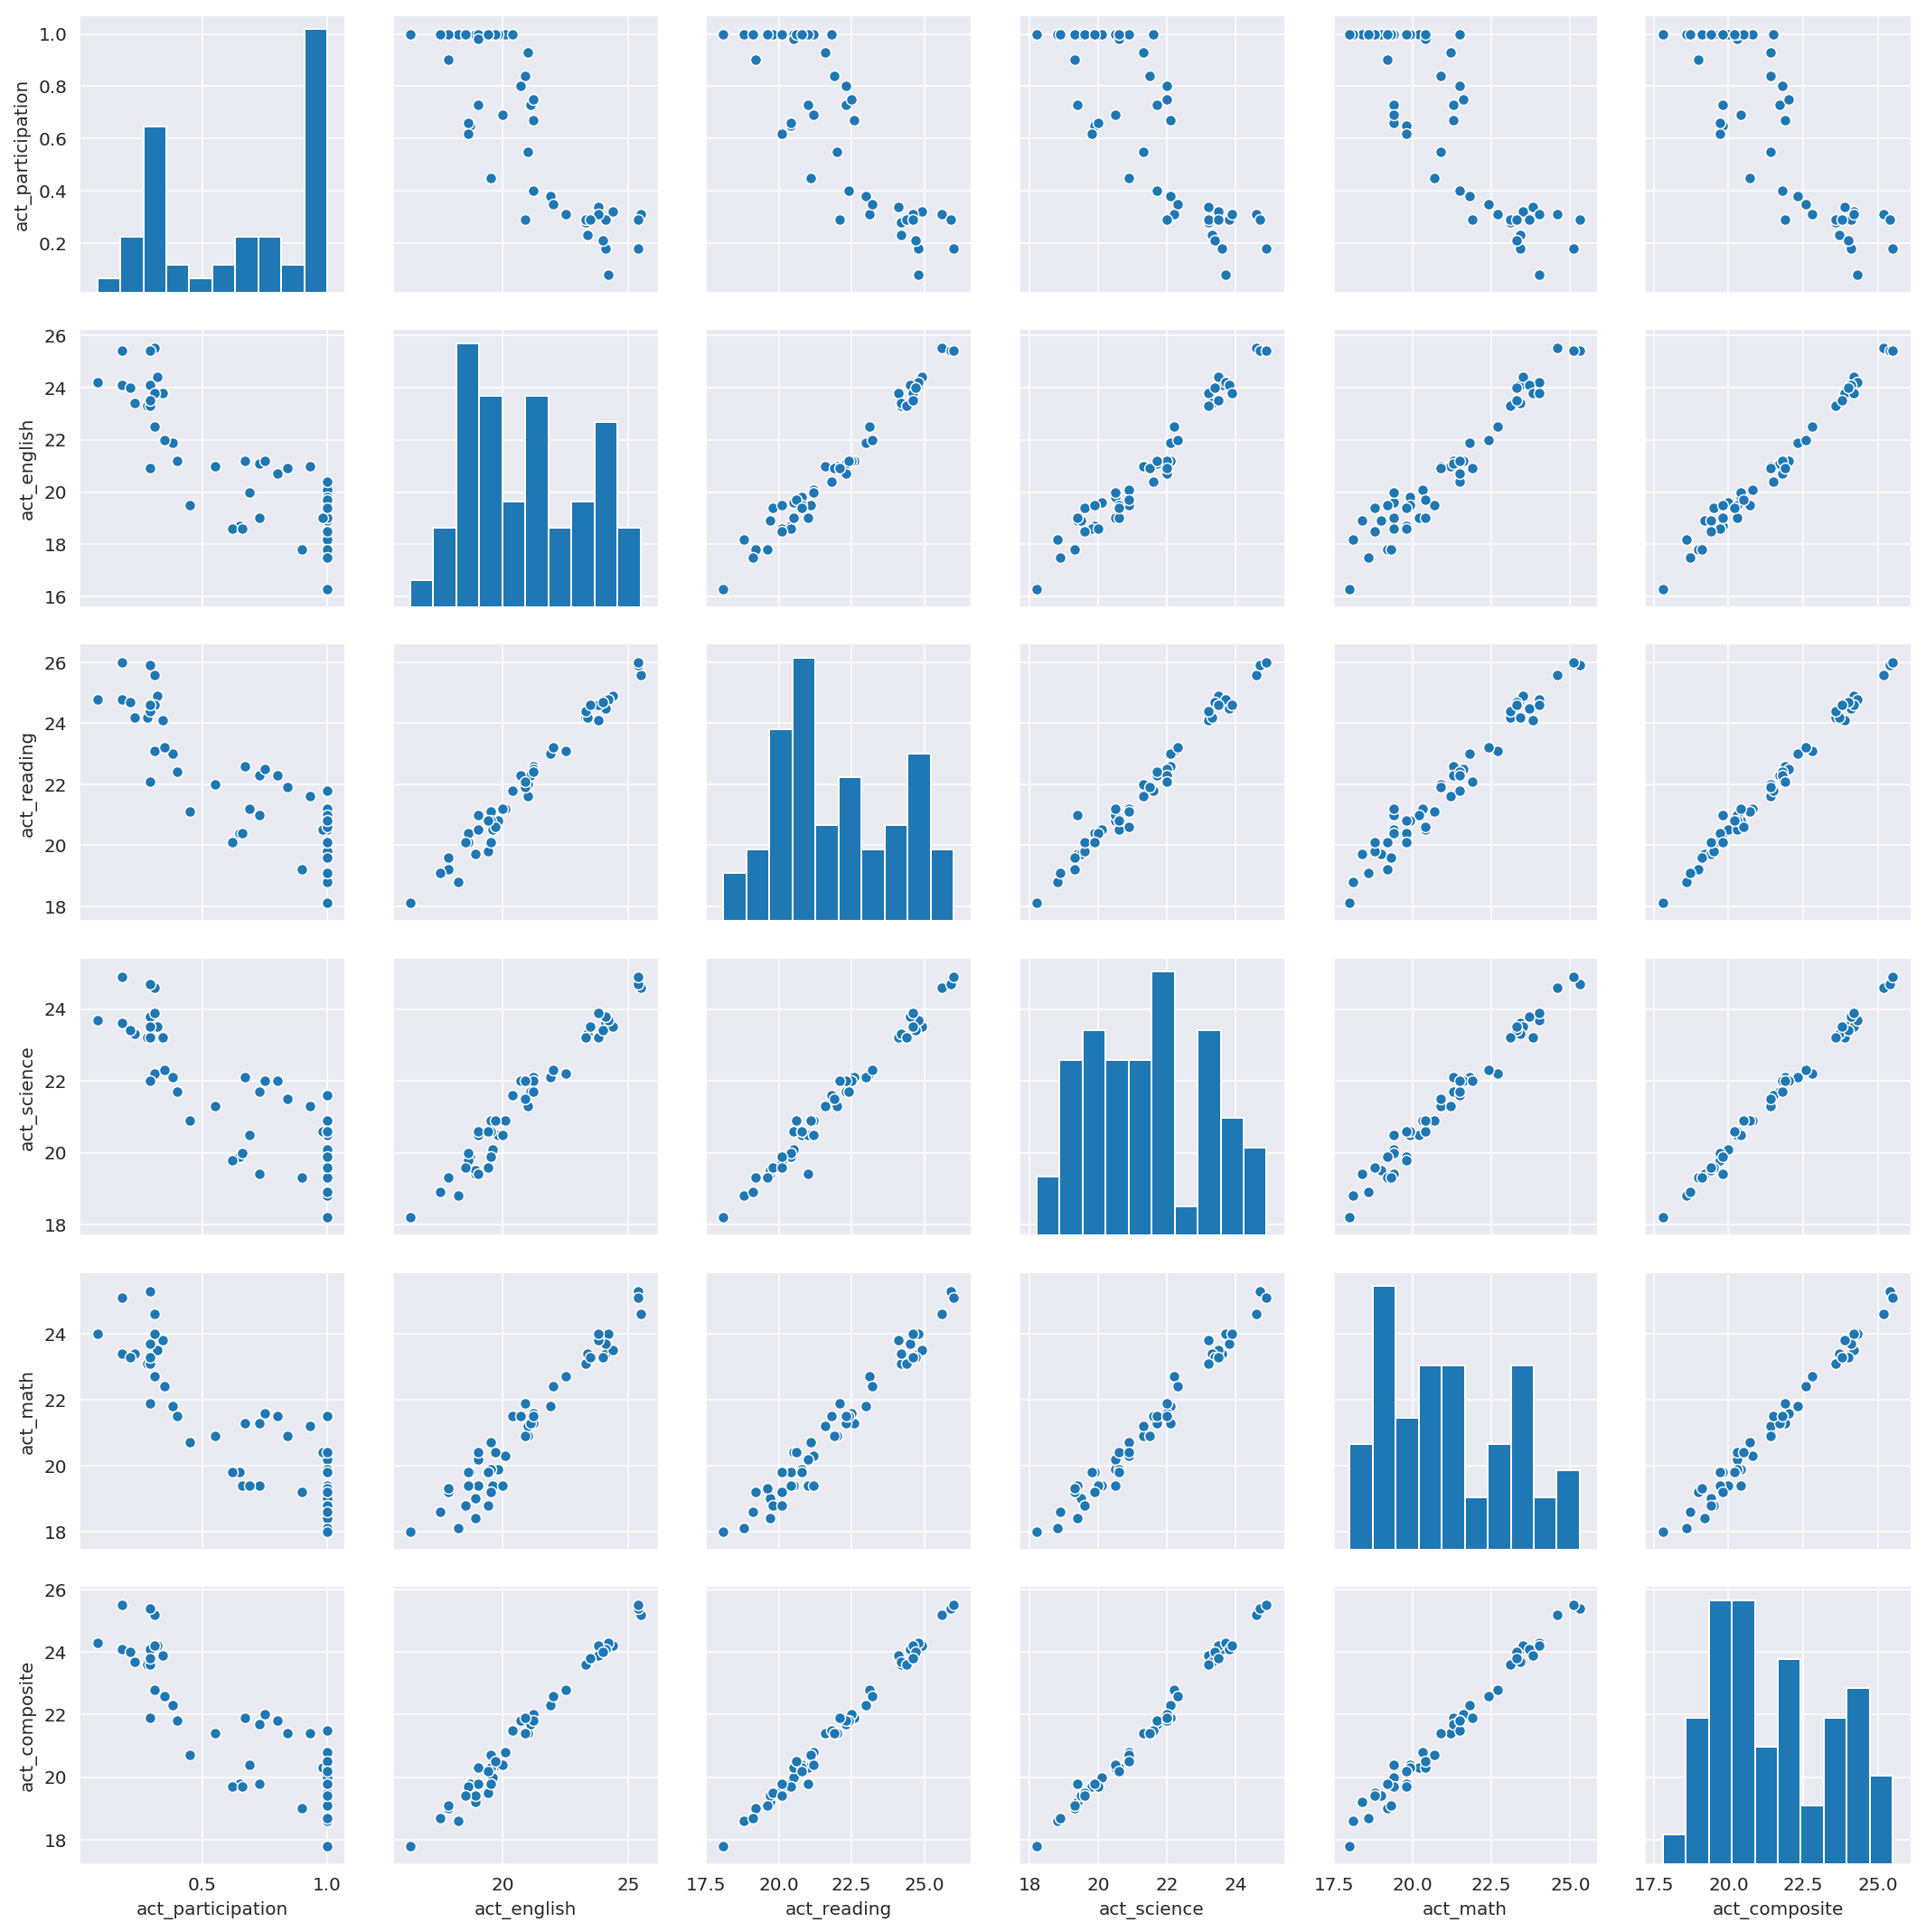

In [44]:
sns.pairplot(tests[['act_participation','act_english','act_reading','act_science','act_math','act_composite']]);

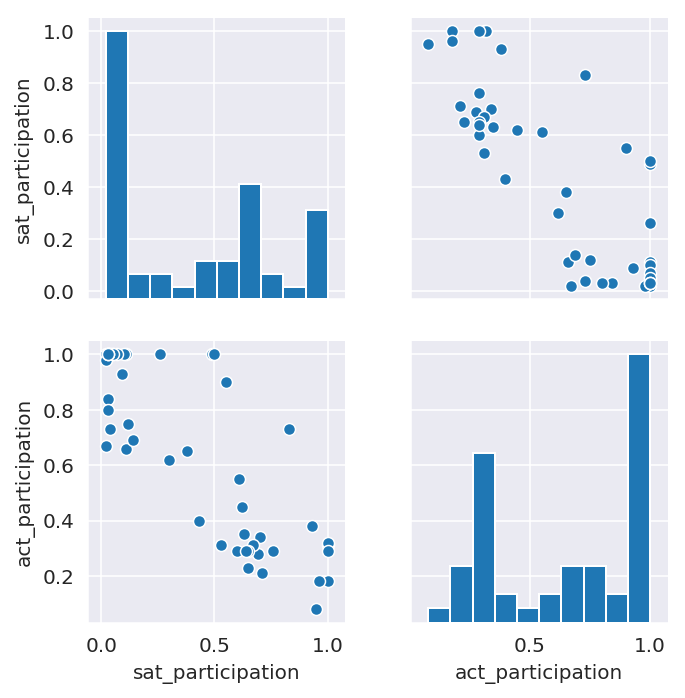

In [45]:
sns.pairplot(tests[['sat_participation','act_participation']]);

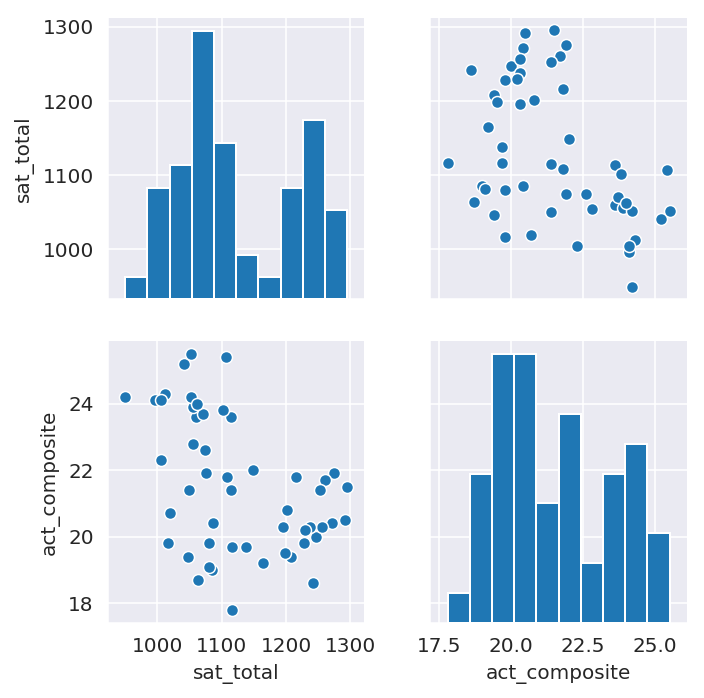

In [46]:
sns.pairplot(tests[['sat_total','act_composite']]);

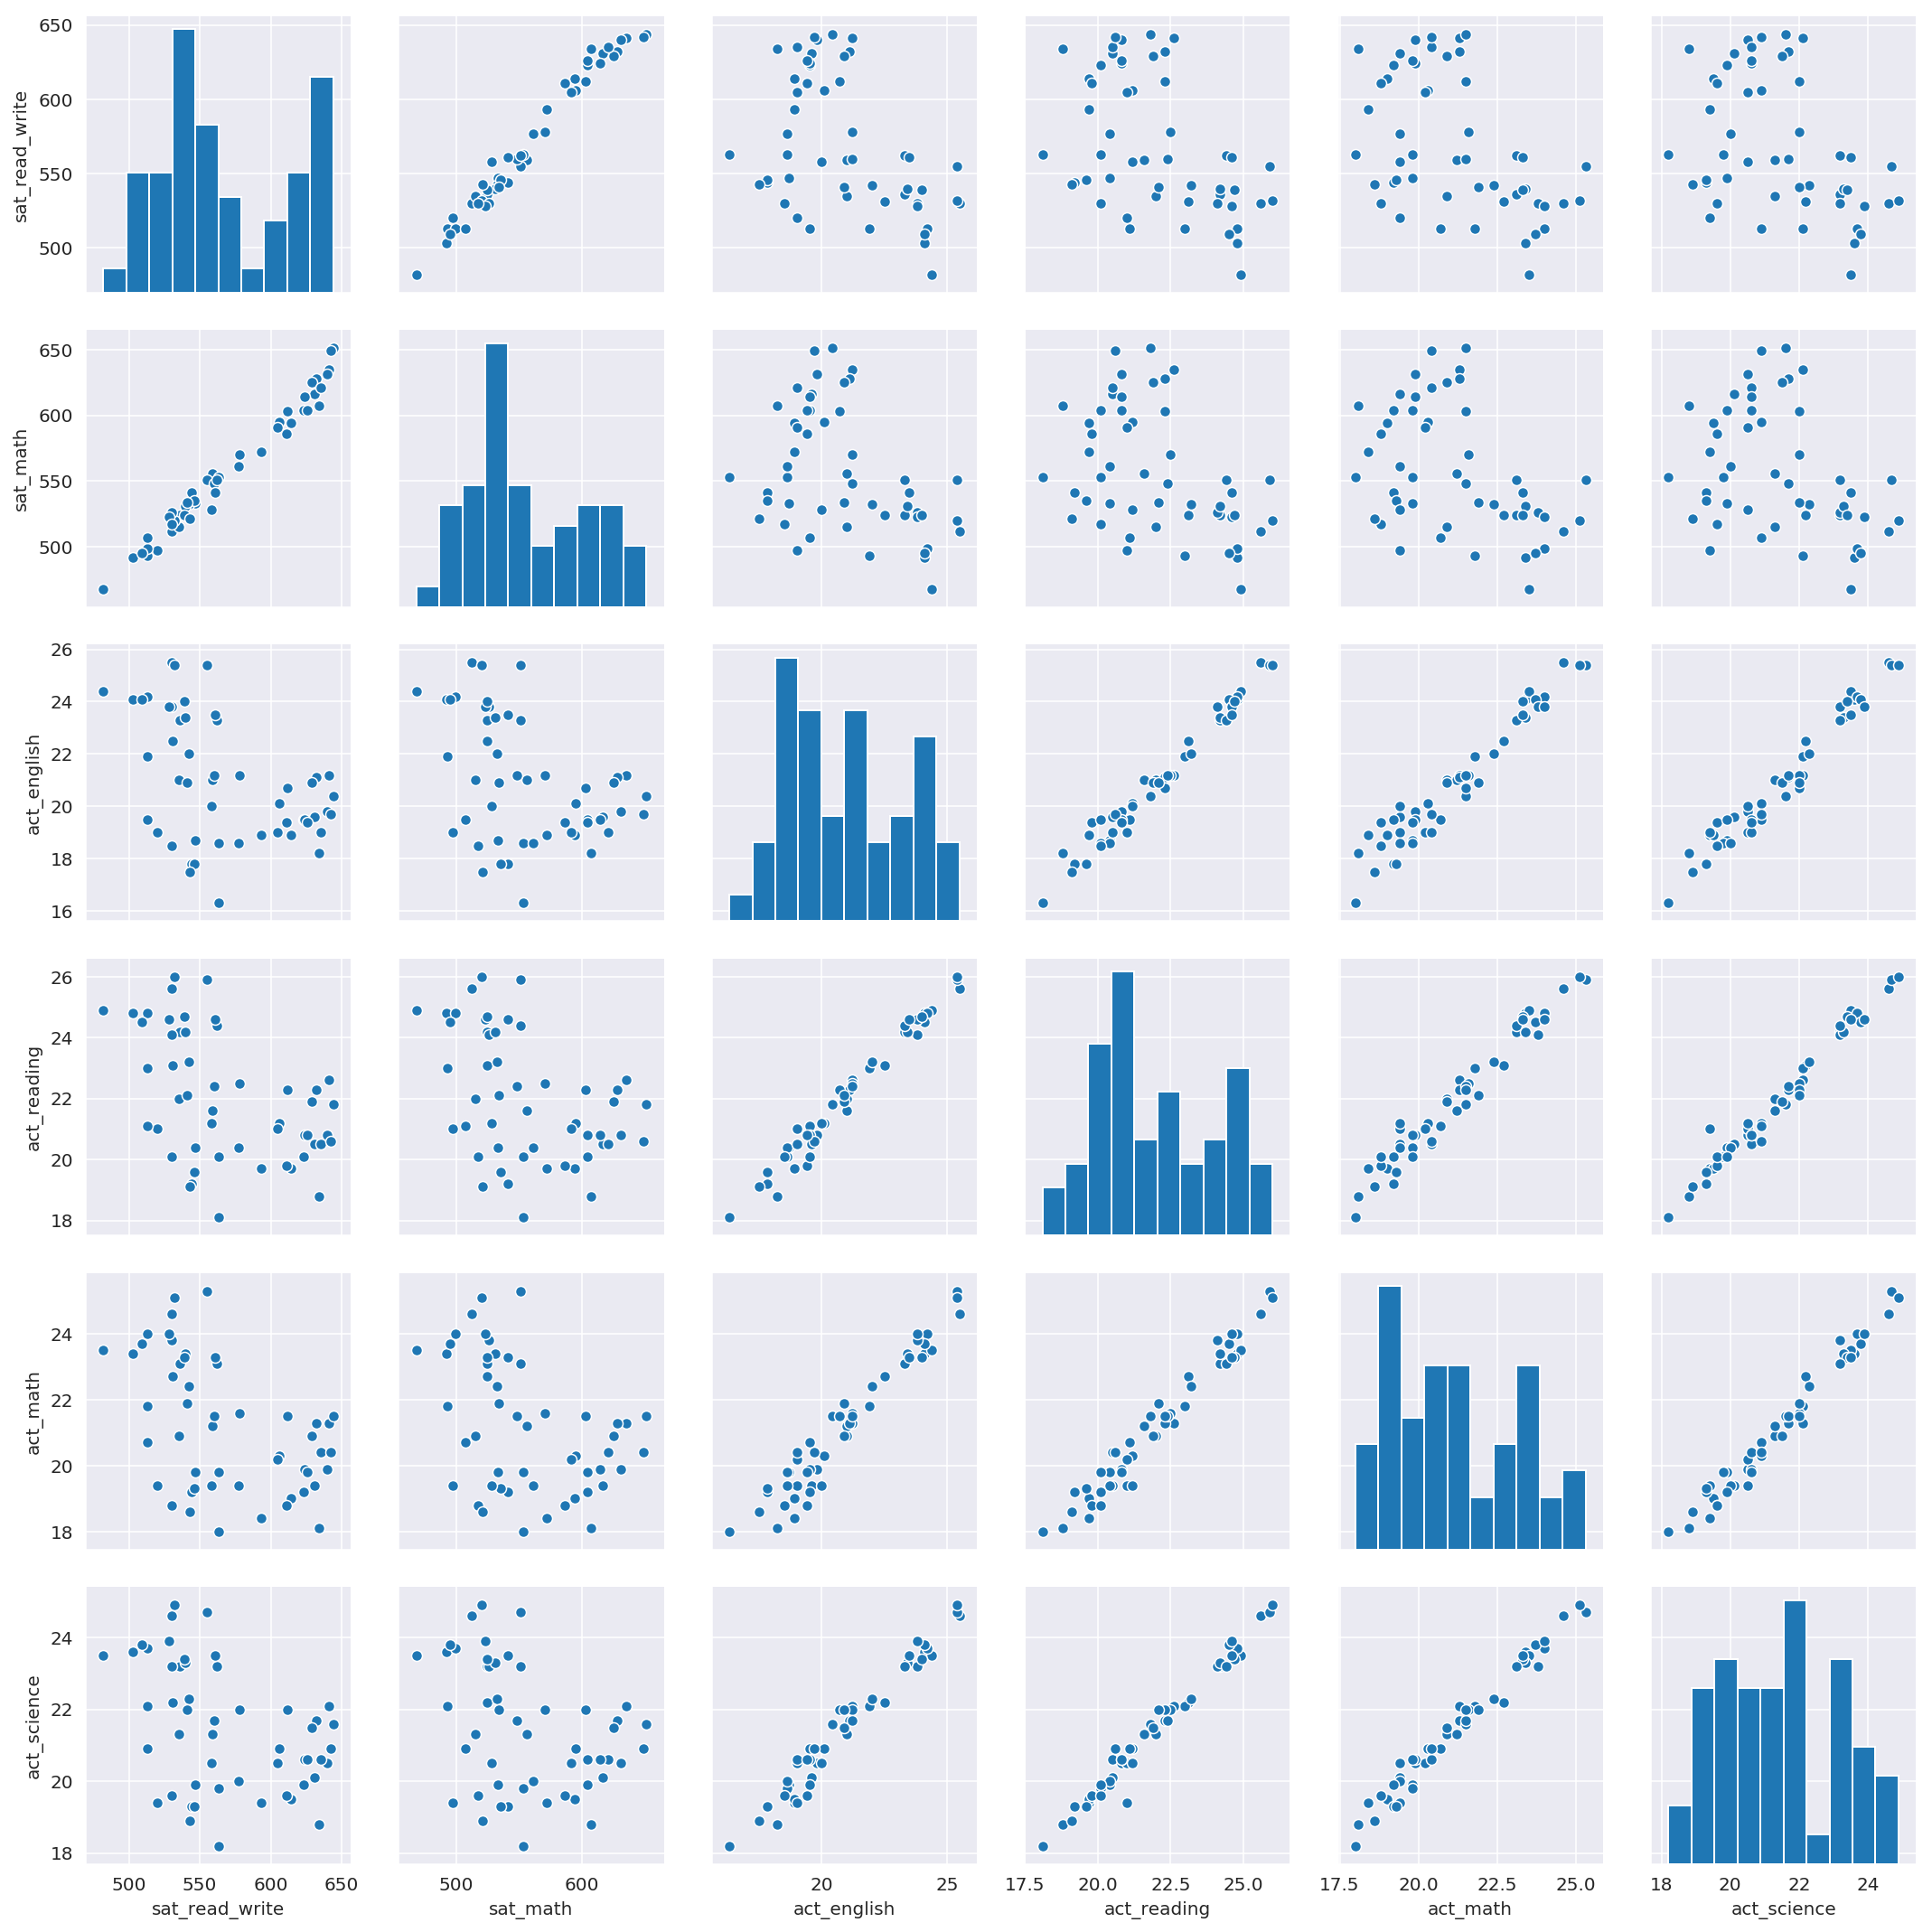

In [47]:
sns.pairplot(tests[['sat_read_write','sat_math','act_english','act_reading','act_math','act_science']]);

##### 22. Are there any interesting relationships to note?

Within each test, the scores on individual sections appear highly correlated with each other, and with the total/composite score. Comparing SAT and ACT scores, however, does not highlight a clear relationship between sat and act scores, on a section by section basis or in total score. SAT and ACT scores in fact appear to be negatively correlated, althout the relationships are not as strong as the within-test correlations. Test scores on each test appear negatively correlated with participation. SAT and ACT participation appear negatively correlated with each other.


##### 23. Create box plots for each variable. 

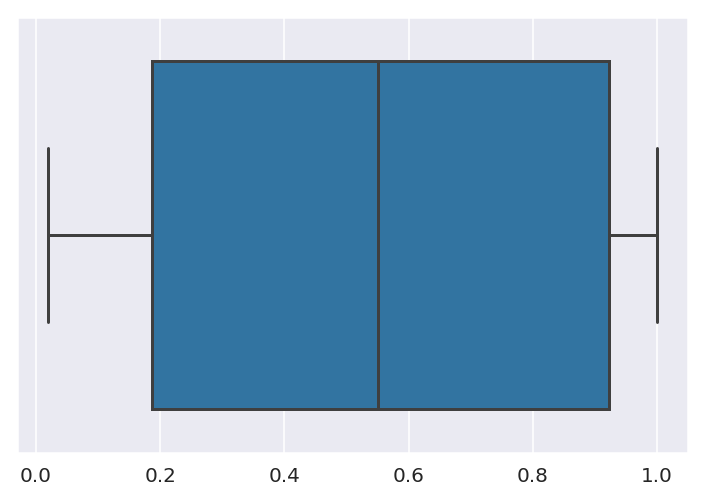

In [48]:
sns.boxplot(tests[['sat_participation','act_participation']]);

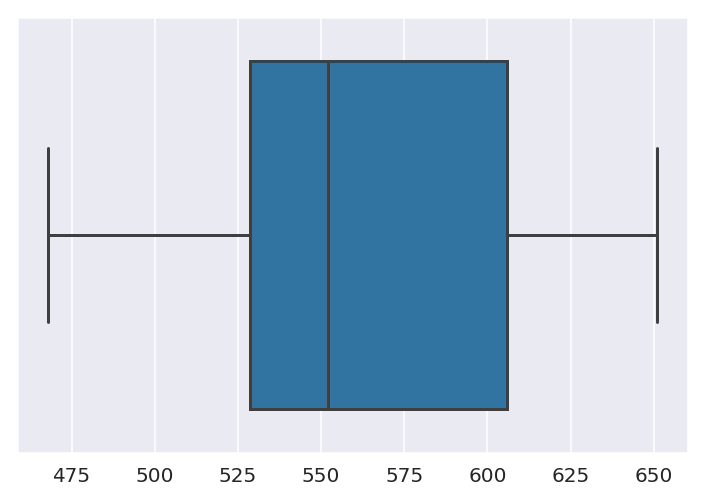

In [49]:
sns.boxplot(tests[['sat_math','sat_read_write']]);

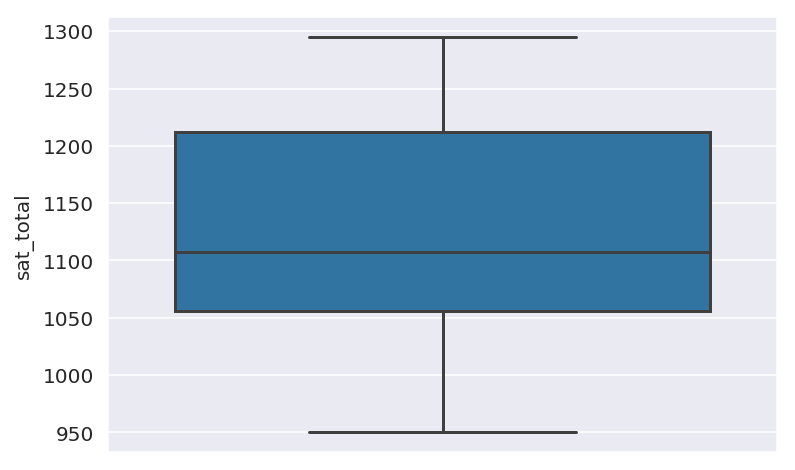

In [50]:
sns.boxplot(tests.sat_total, orient = 'v');

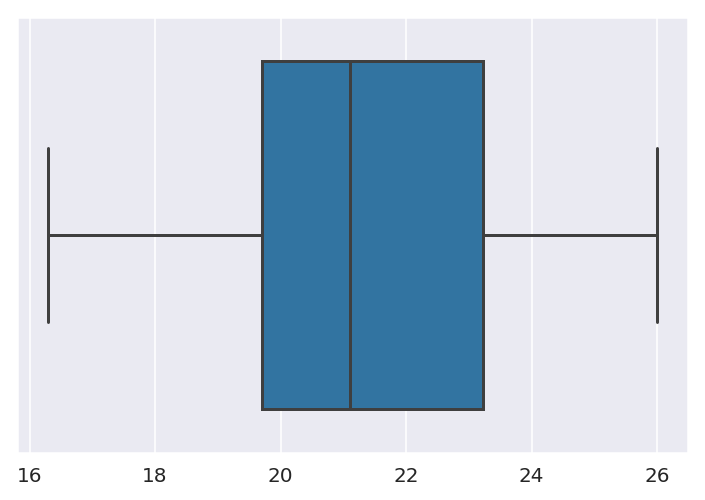

In [51]:
sns.boxplot(tests[['act_math','act_english','act_science','act_reading']]);

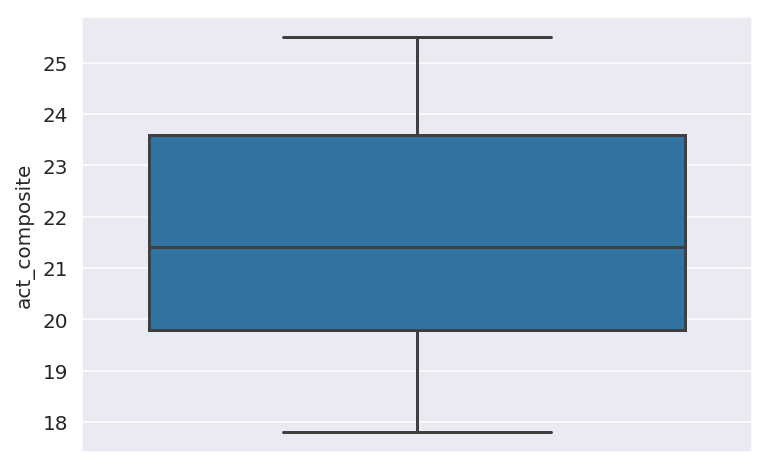

In [52]:
sns.boxplot(tests.act_composite, orient = 'v');

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

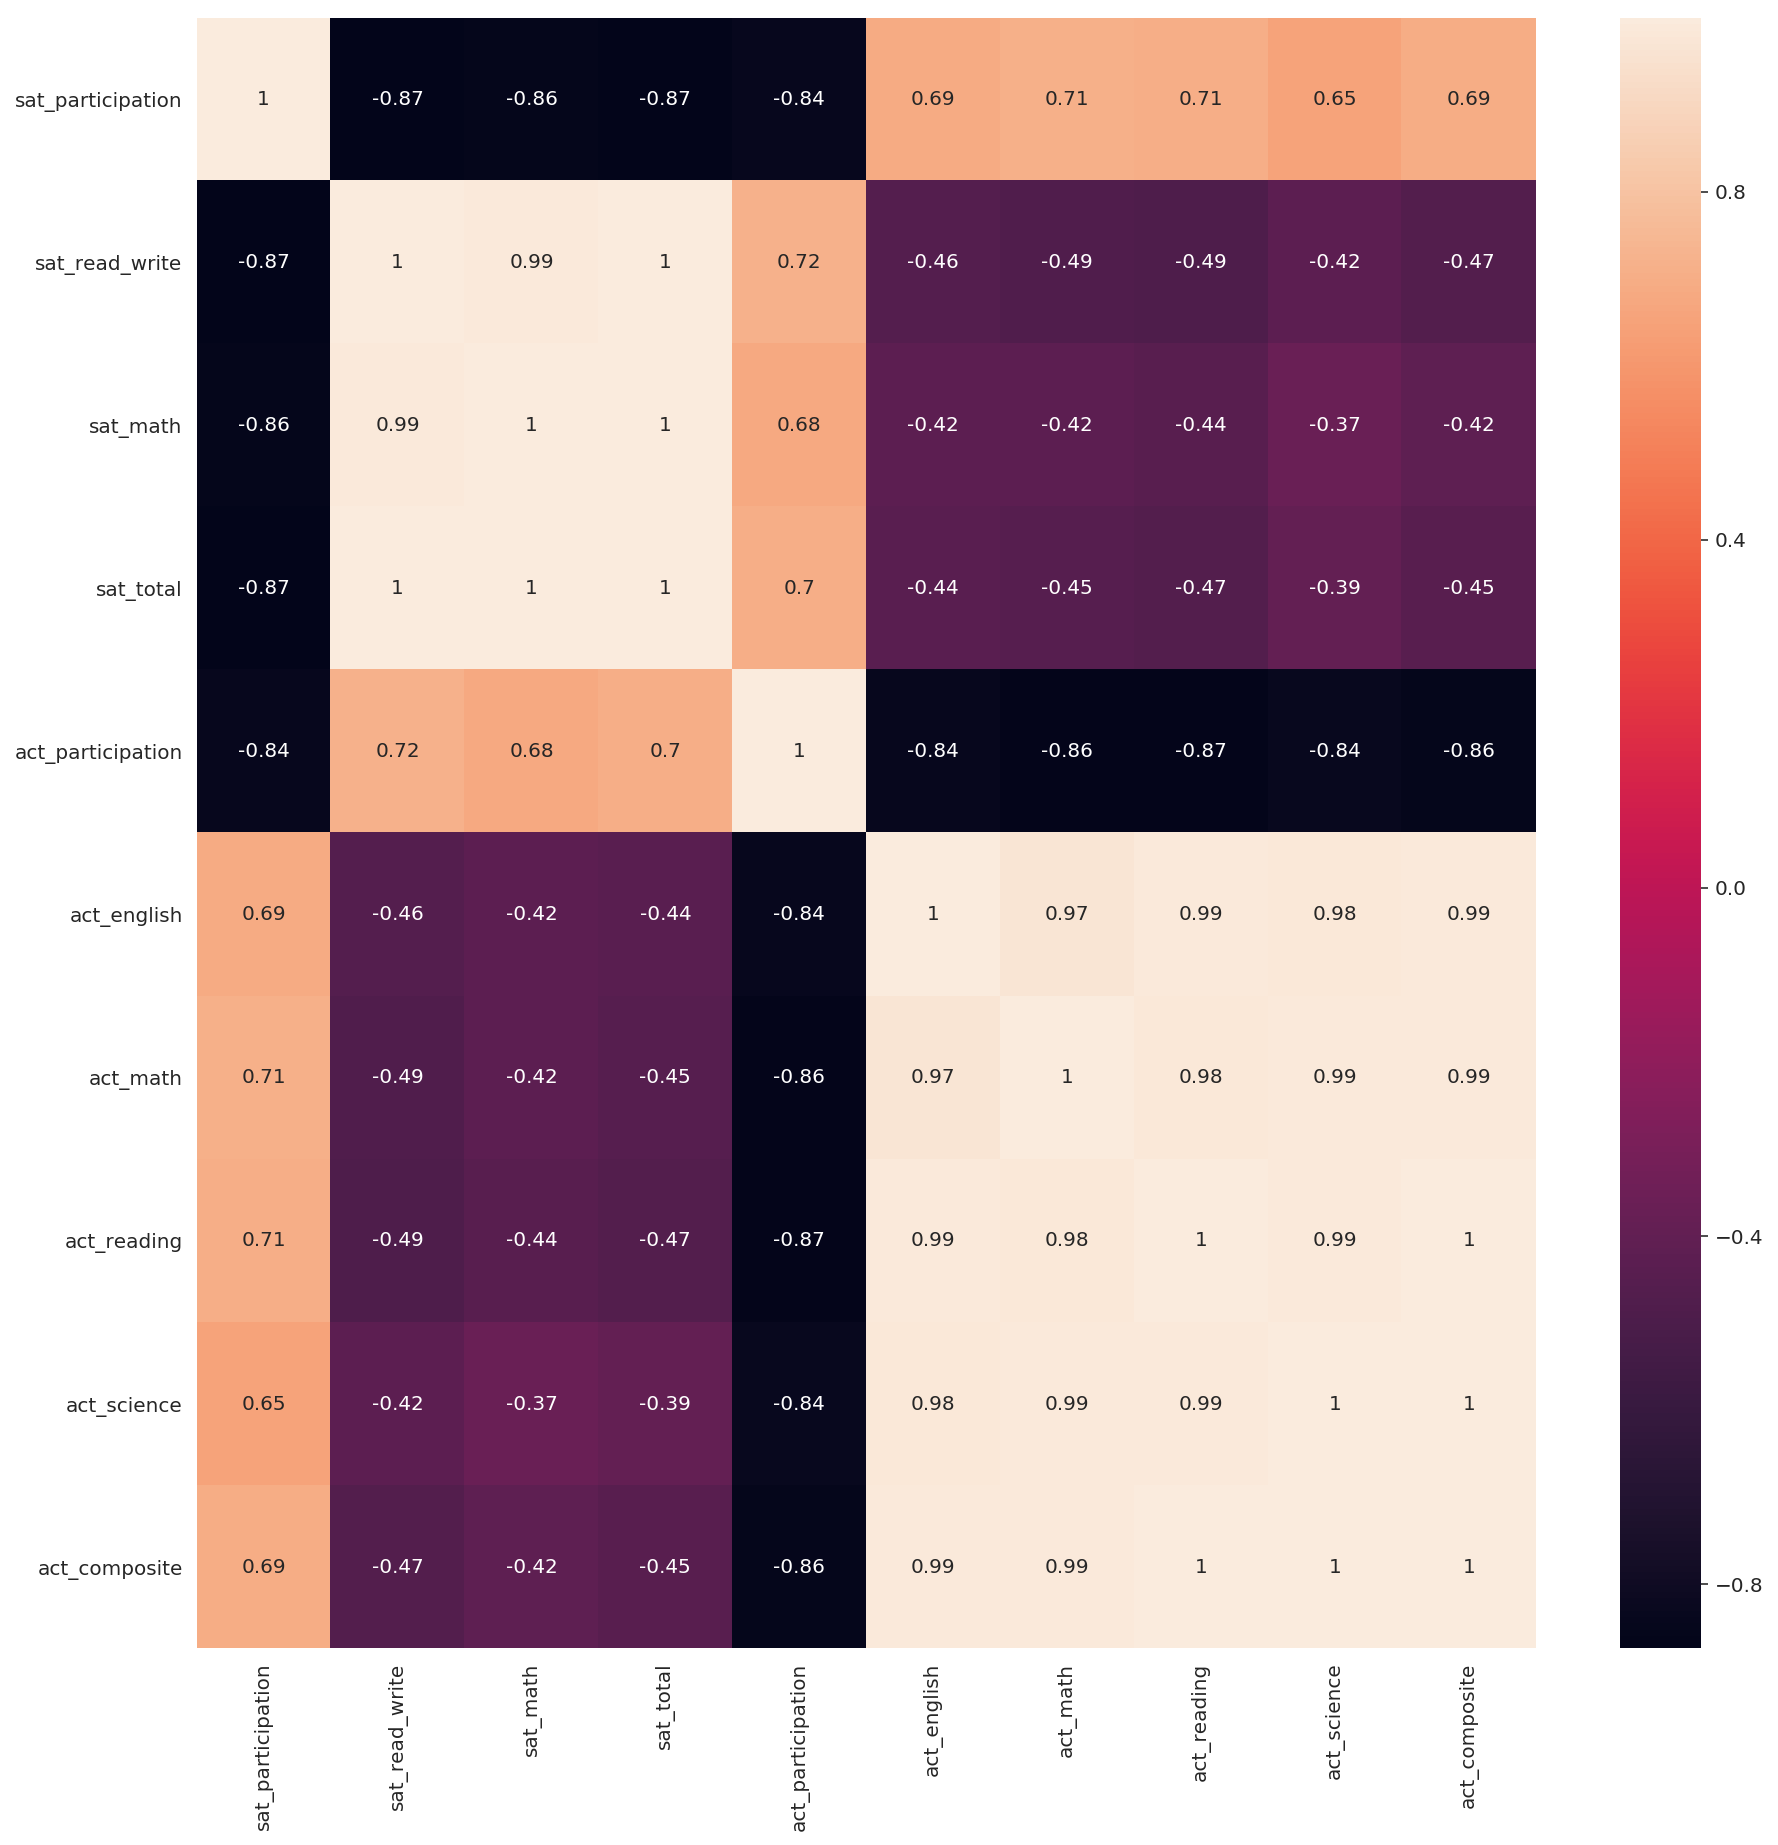

In [53]:
plt.figure(figsize = (15,15))
sns.heatmap(tests.corr(), annot = True);

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Refer back to normal tests data frame created above.

##### Normality
To examine the distributions of the columns in the data, I began with scipy's standard Normal Test, based on D'Agostino and Pearson's test combining skew and kurtosis. For each variable aside from ACT English and ACT Science, the test produced a p-value significantly lower than my alpha value, so based on this test alone, I can reject the null hypothesis that the sample comes from a normal distribution with a 95% confidence.

##### Skewness
To examine the distributions in more detail I calculated and tested the skew and kurtosis of each column. Each column with the exception of ACT Participation (which has a slight negative skew) are slightly positively skewed. The skew tests for each column fail to reject the null hypothesis that the sample come from a distribution with a skew equal to that of the normal distribution (i.e. 0). I think the fact that each column represents a value that can only fall in a bounded range is a significant factor here. The distributions cannot have 'tails' as there is zero probability of seeing values outside the range of possible values for the statistic. 

##### Kurtosis
The data for each column exhibit platykurtosis (less kurtosis than a normal distribution). I believe this is another effect of the lack of tails in the distributions for the data. For all kurtosis tests aside from the one for ACT English, we can reject the null hypothesis that the sample comes from a distribution with kurtosis equal to that of the normal distribution (i.e. 3) with a 95% confidence.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

###### SAT v ACT Participation

Participation in each test appears to be significantly negatively correlated, as the participation rates for the tests exhibit a correlation coefficient of -0.84

##### Participation vs Performance

As seen above in the heatmap of the correlation matrix, participation and performance appear to be negatively correlated. I have displayed a few specific examples of correlation coefficients below.

#### SAT vs ACT Performance

Also described above, I have noticed that performance on SAT appears to be negatively correlated with performance on the ACT, although this is not as strong a relationship as some of the others. For example, the correlation coefficient between SAT Math scores and ACT Math scores is only -0.42.

In [54]:
np.corrcoef(tests.sat_participation, tests.act_participation)

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

In [55]:
np.corrcoef(tests.sat_participation, tests.sat_total)

array([[ 1.        , -0.86753981],
       [-0.86753981,  1.        ]])

In [56]:
np.corrcoef(tests.act_participation, tests.act_composite)

array([[ 1.        , -0.85813416],
       [-0.85813416,  1.        ]])

In [57]:
np.corrcoef(tests.sat_total, tests.act_composite)

array([[ 1.        , -0.44502019],
       [-0.44502019,  1.        ]])

In [58]:
np.corrcoef(tests.sat_math, tests.act_math)

array([[ 1.        , -0.42045604],
       [-0.42045604,  1.        ]])

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [59]:
t_stat, p_value = stats.ttest_ind(tests['sat_participation'], tests['act_participation'])
print('t-Statistic: {}\np-value: {}'.format(round(t_stat, 4), round(p_value, 4)))

t-Statistic: -3.8086
p-value: 0.0002


Given the p-value significantly lower than our significance level, we can reject the null hypothesis that the average SAT and ACT participation rates are equal.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [60]:
# z = 1.96 for a 95% confidence interval
z = 1.96
# confidence interval for SAT participation rates
sat_se = stats.sem(tests.sat_participation)
sat_ci_lower = np.mean(tests.sat_participation) - (z * sat_se)
sat_ci_upper = np.mean(tests.sat_participation) - (z * sat_se)

# confidence interval for ACT participation rates
act_se = stats.sem(tests.act_participation)
act_ci_lower = np.mean(tests.act_participation) - (z * act_se)
act_ci_upper = np.mean(tests.act_participation) - (z * act_se)

print('SAT Participation Confidence Interval: {}, {}\nACT Participation Confidence Interval: {}, {}'.format(sat_ci_lower, sat_ci_upper, act_ci_lower, act_ci_upper))

SAT Participation Confidence Interval: 0.3012207711116876, 0.3012207711116876
ACT Participation Confidence Interval: 0.5643369049287186, 0.5643369049287186


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

My answer to 27 was not surprising given my answer to question 26. Given that I rejected the null hypothesis that the average SAT Participation and ACT Participation values are equal, I would not expect their confidence intervals to overlap. This relationship can be seen clearly in the box plot above showing ACT and SAT participation.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

I do not believe it is appropriate to generate correlation between SAT and ACT math scores, because the sample of students who take each test is not an unbiased sample. States have different policies regarding whether or not the test is compulsory, states' education programs have different levels of emphasis on the tests, and there is significant potential for selection bias in states where it is not required and/or uncommon for students to take one test or the other.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Given that none of the data appear to be normally distributed, it does not make sense to conduct statistical inference given the only the data we have. The tools that we can use for statistical inference rely on the assumption of normality (in the underlying distribution itself or in the sampling distribution via the central limit theorem. We cannot 

# 5. Further Analysis

I believe that the data are distorted by the fact that some states make one or both tests mandatory, while others do not. This means that the averages for each state (participation and scores) do not come from unbiased samples. To investigate this further, I will filter out the states in which the test is compulsory and examine the following:

1. What are the relationships between scores and participation when participation is not mandatory?
2. What is the relationship between SAT and ACT scores when participation is not mandatory?
3. How do the following populations compare: states where the test is mandatory, states where the test is not mandatory, and all states?
4. How did students perform in states with the highest participation, without the test being mandatory?
5. Qualitative data: what are states with high performance, participation doing that others are not?

Sources used:

https://blog.prepscholar.com/which-states-require-the-sat

https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

In [61]:
# List of states where SAT participation is mandatory
sat_mandatory = ['Colorado', 'Connecticut', 'Delaware',
                 'District of Columbia', 'Idaho', 'Illinois',
                 'Maine', 'Michigan', 'New Hampshire', 
                 'Ohio', 'Rhode Island', 'Tennessee']

# List of states where ACT participation is mandatory
act_mandatory = ['Alabama', 'Arkansas', 'Colorado',
                'Kentucky', 'Louisiana', 'Minnesota',
                'Mississippi', 'Missouri', 'Montana', 
                 'Nevada', 'North Carolina', 'Oklahoma',
                'South Carolina', 'Tennessee', 'Utah',
                'Wisconsin', 'Wyoming']

In [62]:
# create a filter for states where SAT is mandatory
sat_filter = tests['state'].isin(sat_mandatory)
sat_mandate = tests[sat_filter]
sat_opt = tests[~sat_filter]

In [63]:
# create a filter for states where ACT is mandatory
act_filter = tests['state'].isin(act_mandatory)
act_mandate = tests[act_filter]
act_opt = tests[~act_filter]

In [64]:
# create a filter for states where both tests are mandatory
both_filter = (tests['state'].isin(sat_mandatory)) & (tests['state'].isin(act_mandatory))
both_mandate = tests[both_filter]

In [65]:
# look at the data if you filter out states where sat is mandatory
sat_opt.describe()

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.317436,577.897436,565.974359,1143.974359,0.708974,20.310256,20.733333,21.512821,21.033333,21.020513
std,0.287564,43.265882,44.758114,87.589800,0.295099,2.084630,1.829629,1.865078,1.589494,1.823412
min,0.020000,513.000000,497.000000,1017.000000,0.230000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.030000,541.500000,529.500000,1072.500000,0.375000,18.900000,19.400000,20.250000,19.700000,19.700000
50%,0.260000,562.000000,551.000000,1114.000000,0.730000,19.700000,20.400000,21.000000,20.600000,20.400000
75%,0.615000,625.000000,605.500000,1234.000000,1.000000,21.200000,21.700000,22.500000,22.050000,21.900000
max,0.830000,644.000000,651.000000,1295.000000,1.000000,25.400000,25.300000,25.900000,24.700000,25.400000


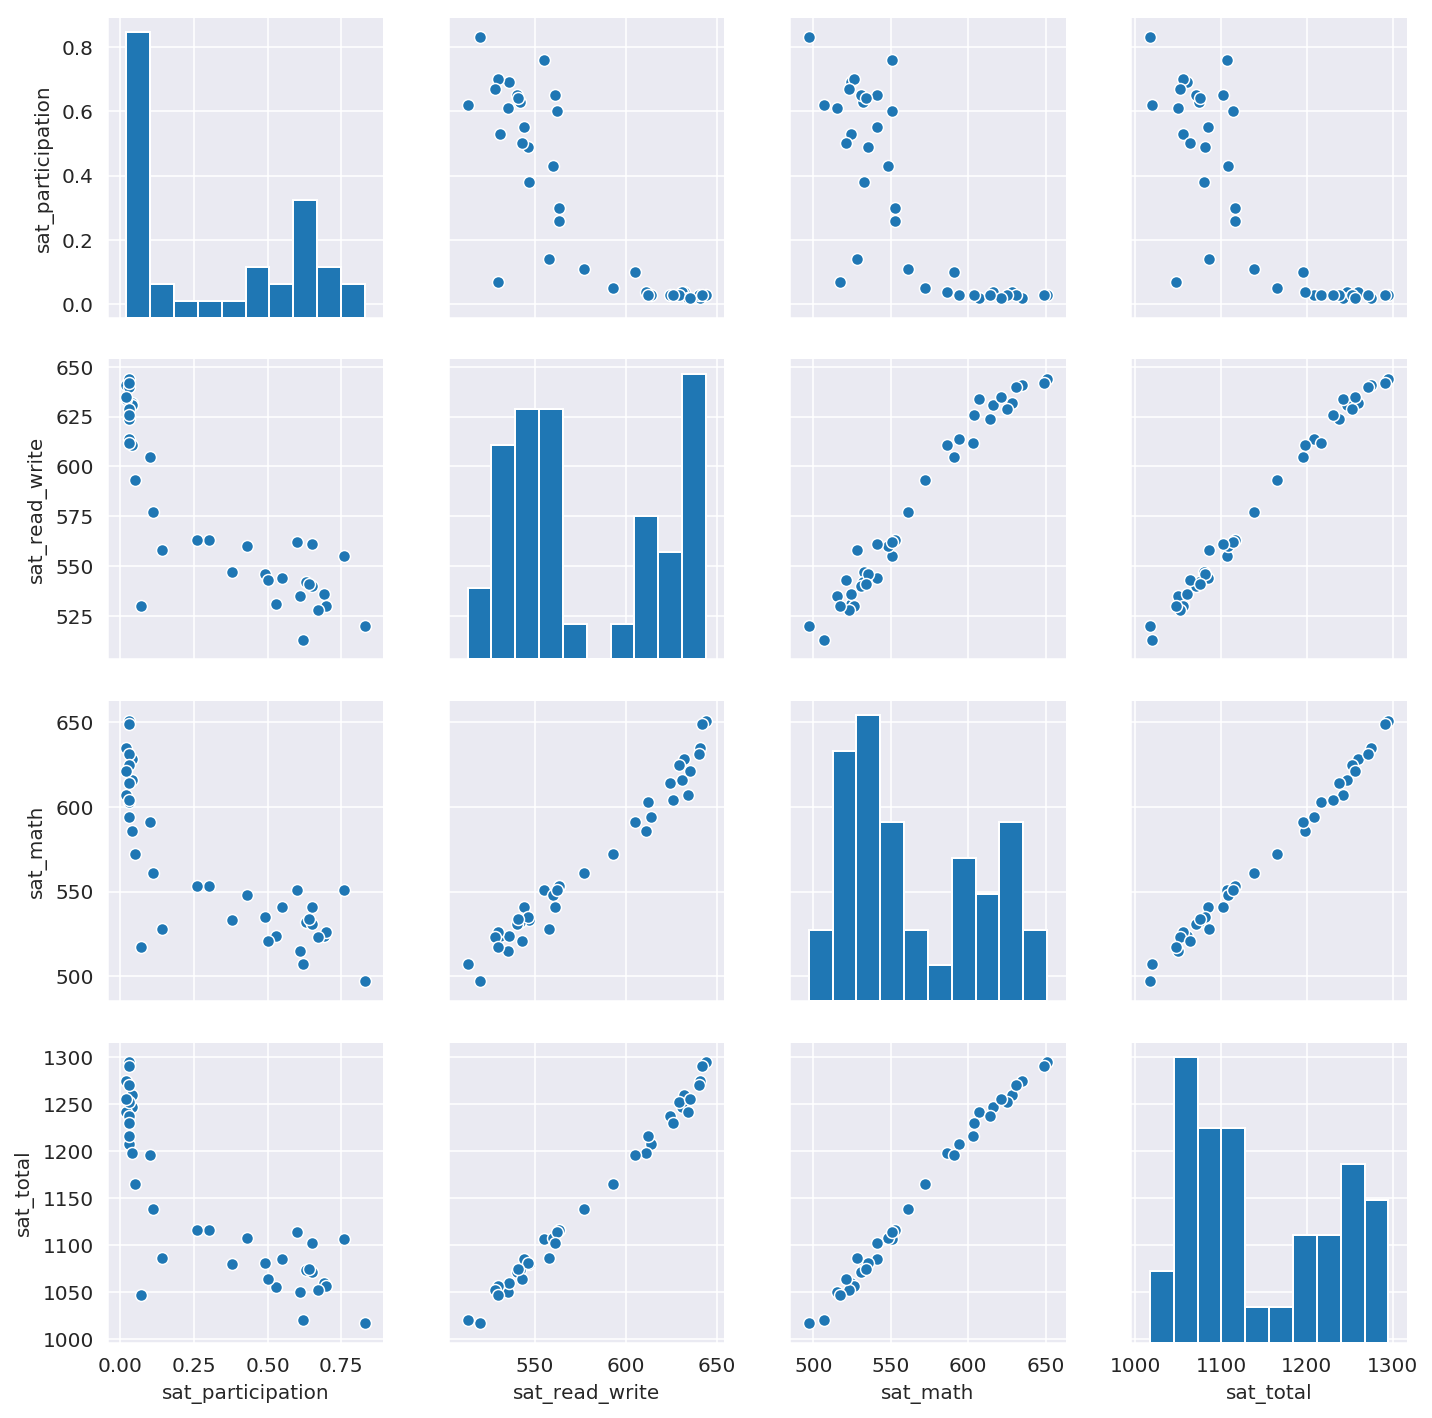

In [66]:
# look at sat scores and participation
sns.pairplot(sat_opt[['sat_participation', 'sat_read_write', 'sat_math','sat_total']]);

In [67]:
sat_mandate.describe()

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.660000,540.583333,527.333333,1068.000000,0.469167,22.950000,22.641667,23.641667,22.808333,23.141667
std,0.426721,43.025274,43.895192,87.001567,0.347496,2.086973,1.803763,1.904759,1.547701,1.822315
min,0.050000,482.000000,468.000000,950.000000,0.080000,19.500000,19.200000,20.100000,19.900000,19.800000
25%,0.117500,512.000000,494.500000,1005.000000,0.202500,21.150000,21.500000,22.275000,21.825000,21.850000
50%,0.940000,531.000000,516.000000,1046.500000,0.315000,24.050000,23.350000,24.600000,23.450000,24.050000
75%,1.000000,563.750000,559.500000,1123.500000,0.795000,24.250000,23.775000,24.825000,23.725000,24.225000
max,1.000000,623.000000,604.000000,1228.000000,1.000000,25.500000,25.100000,26.000000,24.900000,25.500000


In [68]:
act_opt.describe()

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.540882,551.470588,540.029412,1091.558824,0.478824,21.911765,22.079412,22.947059,22.208824,22.411765
std,0.337409,39.227569,41.331978,80.264408,0.251466,2.212878,1.745953,1.831746,1.557264,1.823211
min,0.020000,482.000000,468.000000,950.000000,0.080000,17.800000,19.200000,19.200000,19.300000,19.000000
25%,0.180000,530.000000,516.250000,1050.500000,0.290000,20.750000,20.900000,21.675000,21.300000,21.400000
50%,0.625000,541.500000,531.500000,1074.500000,0.365000,21.550000,21.850000,22.800000,22.100000,22.150000
75%,0.747500,561.750000,552.500000,1114.750000,0.685000,23.800000,23.400000,24.575000,23.475000,23.975000
max,1.000000,641.000000,635.000000,1275.000000,0.980000,25.500000,25.300000,26.000000,24.900000,25.500000


In [69]:
act_mandate.describe()

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.112353,604.411765,590.588235,1195.176471,1.0,18.970588,19.388235,20.147059,19.935294,19.735294
std,0.154941,36.851151,40.059423,76.438076,0.0,1.041492,0.926608,0.938827,0.889481,0.911003
min,0.020000,530.000000,517.000000,1047.000000,1.0,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.030000,593.000000,572.000000,1165.000000,1.0,18.500000,18.800000,19.700000,19.400000,19.200000
50%,0.040000,614.000000,595.000000,1208.000000,1.0,19.400000,19.300000,20.100000,19.900000,19.800000
75%,0.100000,631.000000,614.000000,1242.000000,1.0,19.600000,19.900000,20.800000,20.600000,20.300000
max,0.500000,644.000000,651.000000,1295.000000,1.0,20.400000,21.500000,21.800000,21.600000,21.500000


In [70]:
both_mandate.describe()

,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.080000,614.500000,599.500000,1214.500000,1.0,19.800000,19.750000,20.650000,20.400000,20.300000
std,0.042426,12.020815,6.363961,19.091883,0.0,0.424264,0.777817,0.777817,0.707107,0.707107
min,0.050000,606.000000,595.000000,1201.000000,1.0,19.500000,19.200000,20.100000,19.900000,19.800000
25%,0.065000,610.250000,597.250000,1207.750000,1.0,19.650000,19.475000,20.375000,20.150000,20.050000
50%,0.080000,614.500000,599.500000,1214.500000,1.0,19.800000,19.750000,20.650000,20.400000,20.300000
75%,0.095000,618.750000,601.750000,1221.250000,1.0,19.950000,20.025000,20.925000,20.650000,20.550000
max,0.110000,623.000000,604.000000,1228.000000,1.0,20.100000,20.300000,21.200000,20.900000,20.800000


Filtering out states with mandatory testing produces some interesting observations, but the same basic relationships hold. One hypothesis I have is that there is a selection bias which is driving the relationships highlighted above (inverse relationships between participation and scores, inverse relationships b/w SAT and ACT, etc.). I'd like to take a look and visualize what it looks like if we filter out states with very low participation rates on either test.

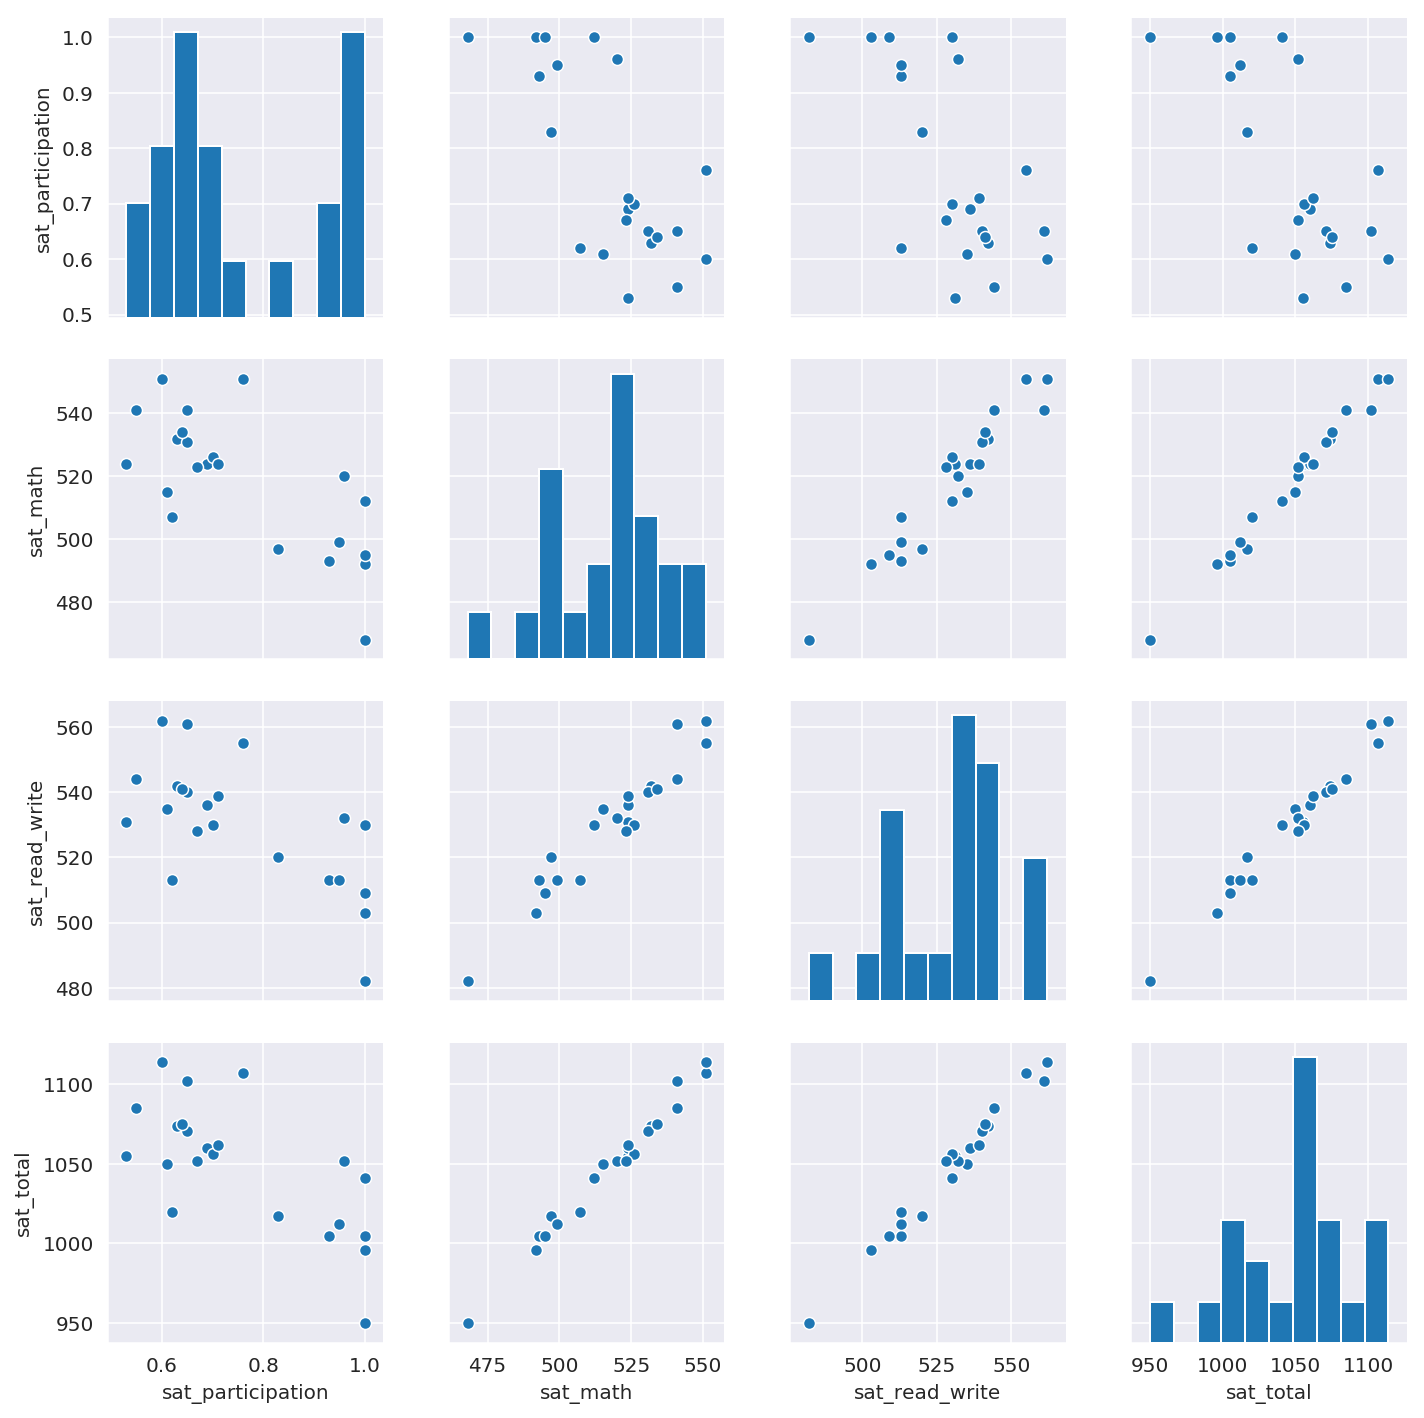

In [71]:
sat_filtered = sat[sat_participation_filter]
sns.pairplot(sat_filtered[['sat_participation','sat_math','sat_read_write','sat_total']]);

The same relationships appear to hold even when removing states with very low sat participation.

## Test Participation and High School Graduation Rates

In order to examine the relationship between test participation rates and other outcomes, I have downloaded data on High School Graduation Rates for the 2015-2016 school year from the National Center for Education Statistics.

Note that since the graduation rates are from a different cohort of students than the test data, I am making the assumption that test participation rates and graduation rates do not vary significantly from one year to the next on a state by state basis. A more in depth study using data on test scores, graduation rates, and more over several years would help round out the analysis and test my assumption above.

Source for data: https://nces.ed.gov/ccd/tables/ACGR_RE_and_characteristics_2015-16.asp

In [84]:
# Import data on high school graduation rates
high_school_grad = pd.read_csv('../data/highschool.csv')
high_school_grad

,United States2,84.1
0,State,Grad Rate
1,Iowa,91.3
2,New Jersey,90.1
3,West Virginia,89.8
4,Nebraska,89.3
5,Texas,89.1
6,Missouri,89.0
7,Kentucky,88.6
8,Tennessee,88.5
9,New Hampshire,88.2


In [85]:
high_school_grad.dtypes

    United States2    object
84.1                  object
dtype: object

In [86]:
high_school_grad.columns = ['state','grad_rate']

In [87]:
high_school_grad.iloc[0].drop

<bound method Series.drop of state            State
grad_rate    Grad Rate
Name: 0, dtype: object>

In [88]:
high_school_grad.drop(0)

,state,grad_rate
1,Iowa,91.3
2,New Jersey,90.1
3,West Virginia,89.8
4,Nebraska,89.3
5,Texas,89.1
6,Missouri,89.0
7,Kentucky,88.6
8,Tennessee,88.5
9,New Hampshire,88.2
10,Wisconsin,88.2


In [89]:
data = pd.merge(tests, high_school_grad, on = 'state', how = 'inner')

In [90]:
data

,state,sat_participation,sat_read_write,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,grad_rate
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,87.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,76.1
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,79.5
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,87.0
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,83.0
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,78.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,87.4
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,85.5
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,69.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,80.7


In [91]:
data['grad_rate'] = (data['grad_rate'].astype(float)) / 100

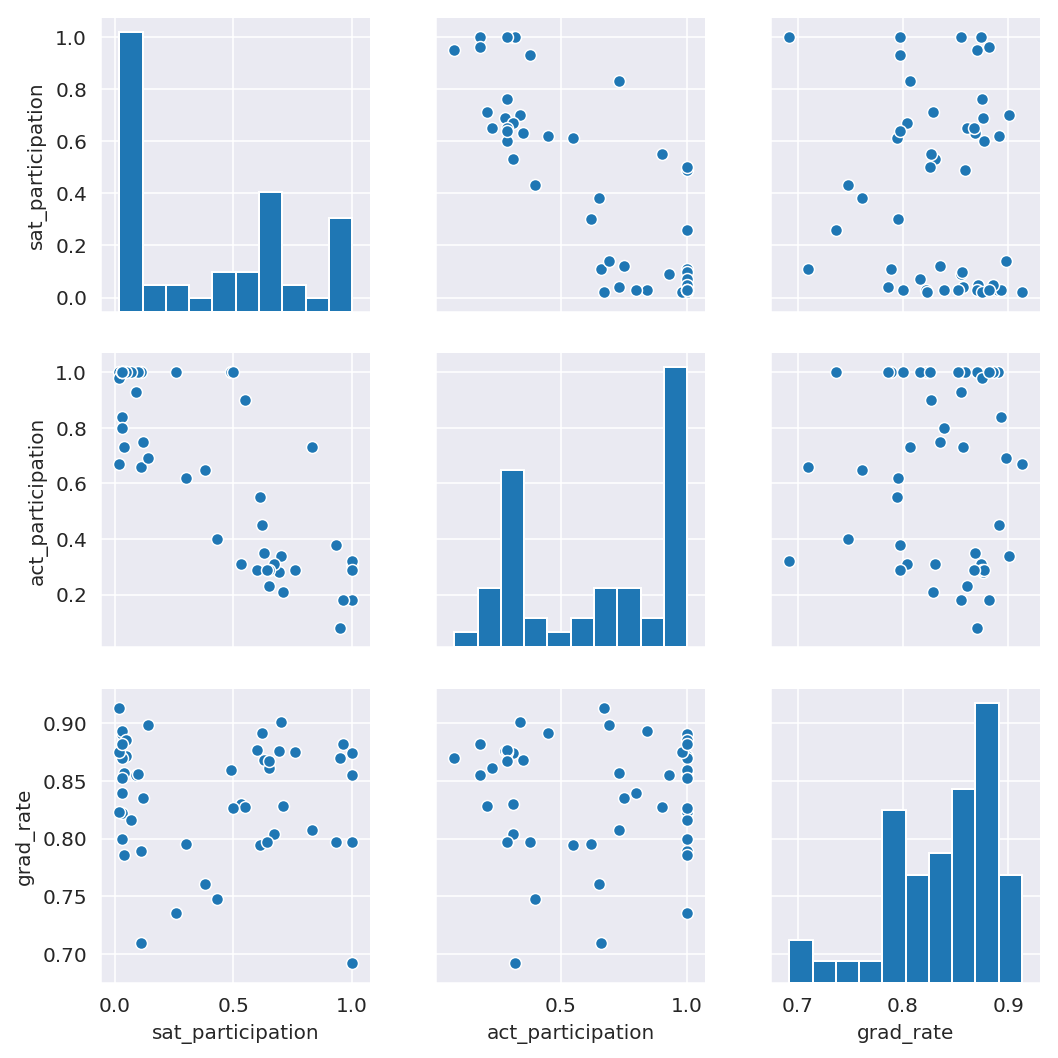

In [92]:
sns.pairplot(data[['sat_participation','act_participation','grad_rate']]);

In [93]:
np.corrcoef(data.sat_participation,data.grad_rate)

array([[ 1.        , -0.10982322],
       [-0.10982322,  1.        ]])

I'm curious to see what happens if we remove states with very low and very high participation rates.

In [94]:
sat_rm_outliers = (data['sat_participation'] > 0.1) & (data['sat_participation'] < 0.9)

In [95]:
np.corrcoef(data[sat_rm_outliers].sat_participation, data[sat_rm_outliers].grad_rate)

array([[1.        , 0.44326946],
       [0.44326946, 1.        ]])

After accounting for states with very low and very high participation rates, I can quantify what can be observed by looking at the lower left pane of the above pairplots diagram - SAT Participation is indeed positively correlated with one desirable outcome that we might care about: high-school graduation rates.

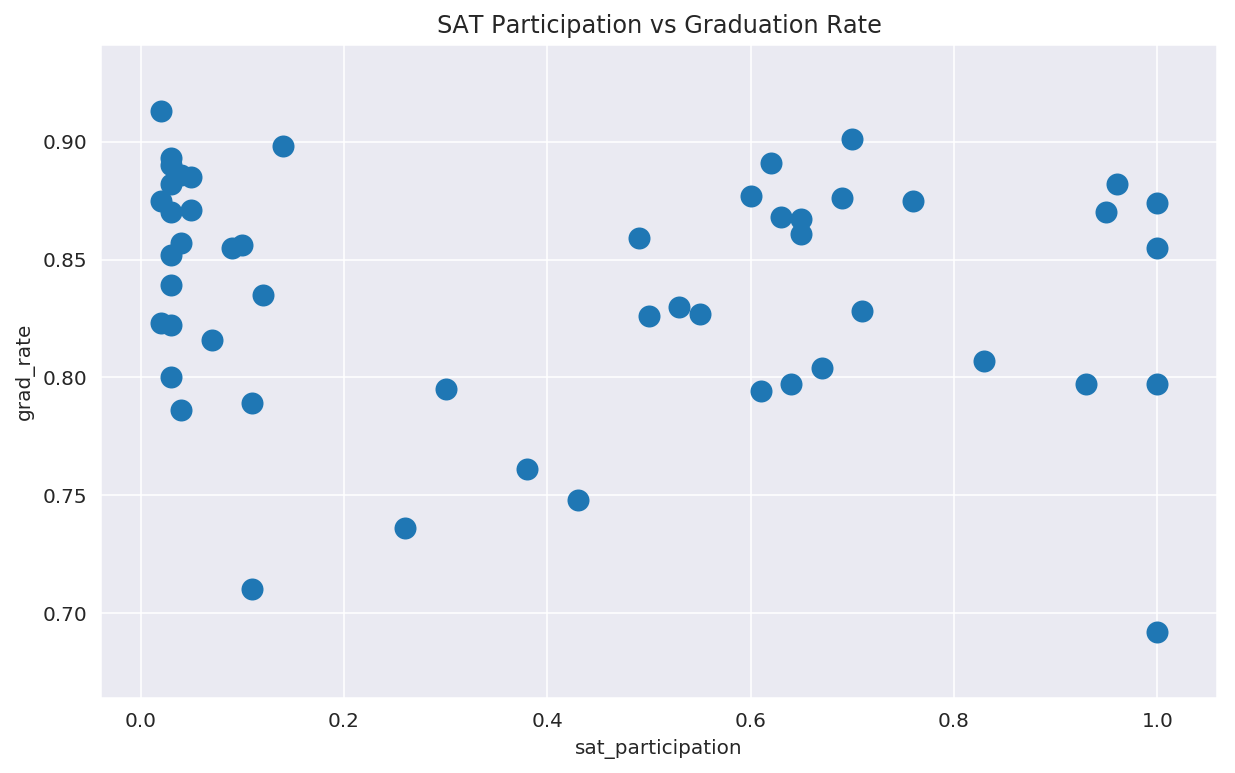

In [108]:
data.plot(
    title = 'SAT Participation vs Graduation Rate',
    kind = 'scatter',
    x = 'sat_participation',
    y = 'grad_rate',
    figsize = (10,6),
    s = 100);

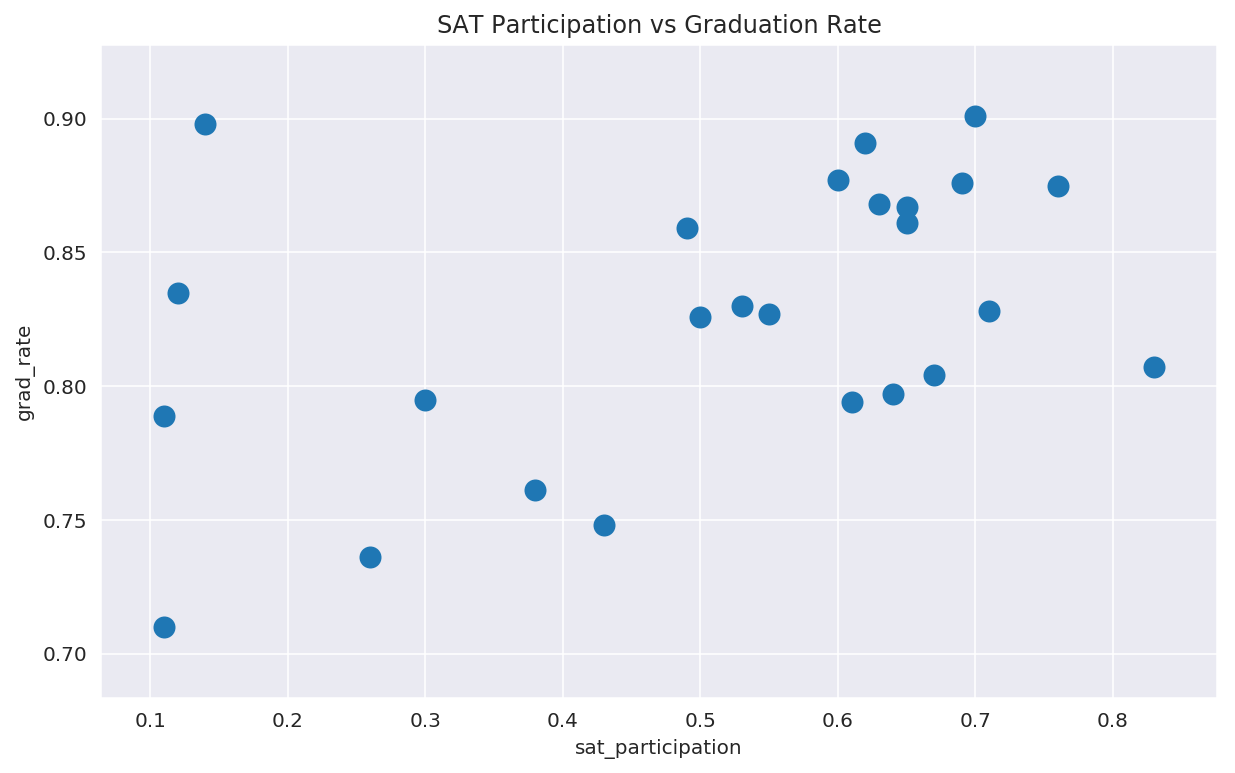

In [110]:
data[sat_rm_outliers].plot(
    title = 'SAT Participation vs Graduation Rate',
    kind = 'scatter',
    x = 'sat_participation',
    y = 'grad_rate',
    figsize = (10,6),
    s = 100);

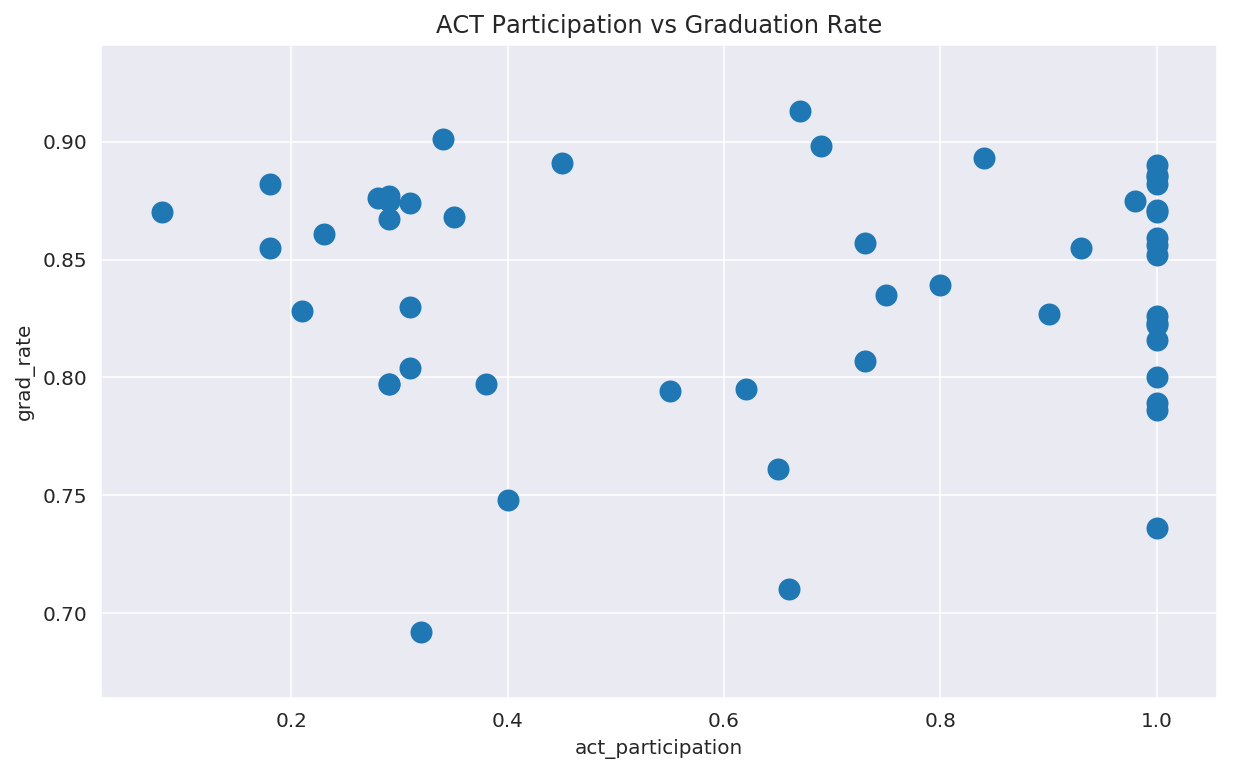

In [107]:
data.plot(
    title = 'ACT Participation vs Graduation Rate',
    kind = 'scatter',
    x = 'act_participation',
    y = 'grad_rate',
    figsize = (10,6),
    s = 100);